<h1><center>Sprint 11: PROJECTE FINAL</center></h1>
<h2><center>Fons d'Inversió vs ETFs </center></h2>

Les inversions econòmiques són una part important de moltes estratègies financeres individuals i empresarials, ja que ofereixen una manera de fer créixer el patrimoni i generar ingressos a llarg termini. Tanmateix, l'elecció de les inversions adequades pot ser complicada i requereix una anàlisi curosa de la situació econòmica i les perspectives de cada individu.

Hi ha moltes opcions de productes d'inversió disponibles per als inversors, incloses inversions en empreses a través de l'adquisició d'accions o deute, inversions en matèries primeres com l'or i els hidrocarburs, i inversions en instruments financers com els fons d'inversió i els ETFs. Per als inversors individuals, la diversificació és clau per reduir el risc i maximitzar els guanys. No obstant això, aquesta diversificació pot ser difícil d'assolir per als inversors amb pocs coneixements i temps per investigar. Els fons d'inversió i els ETFs (o fons d'inversió en borsa) ofereixen una solució a aquesta qüestió, ja que permeten als inversors accedir a una cartera diversificada de valors amb una sola inversió. A més, molts d'aquests fons tenen requisits de mínims d'inversió relativament baixos i les comissions són generalment més baixes que invertir en accions individuals.

Els fons d'inversió i els ETFs tenen una cosa en comú: tots dos són vehicles d'inversió col·lectiva, el que significa que els inversors hi aporten diners i aquests diners es gestionen per un gestor d'inversions professional. Però, mentre que els fons d'inversió es compren i venen a través de la gestora o d'un comercialitzador, els ETFs cotitzen en borsa com si fossin accions i es poden comprar i vendre durant el dia de negociació. La seva forma de gestionar les inversions són molt diferents, en els ETFs l'objectiu sol ser replicar el valor d'un índex (com pot ser l'Íbex 35 o el MSCI World) o el valor d'una matèria primera (com l'or). En els fons d'inversió trobem dues grans tipologies. Els de gestió passiva, que s'assemblen a un ETFs però sense cotitzar en borsa, i els de gestió activa, els quals el gestor decideix activament on invertir amb la missió de superar un índex que depèn de la categoria d'inversions del fons.

Una altra diferència important és la seva estructura de costos. Els fons d'inversió solen cobrar comissions més elevades que els ETFs, incloent-hi comissions d'entrada i sortida, comissions de gestió i altres despeses. D'altra banda, els ETFs solen tenir comissions més baixes, ja que no hi ha comissions d'entrada o sortida i les despeses de gestió són més baixes.

Per aprofundir en les diferències entre els costos i la rendibilitat entre els ETFs i els fons d'inversió, utilitzarem un dataset descarregat de kaggle.com (_European Funds dataset from Morningstar_). Aquest dataset conté dades de Morningstar, un dels portals més rellevants en matèria de fons d'inversió i ETFs, i ofereix informació detallada sobre qualsevol producte relacionat amb aquests instruments financers. A través d'aquesta font de dades, podrem accedir a informació descriptiva, així com a la rendibilitat històrica i la composició de carteres de cada fons i ETF. Cal afegir que en el dataset sols apareixen aquells fons i ETFs que són comercialitzats en Europa, però no significa que les inversions sols poden ser en Europa. Les inversions econòmiques són una part important de moltes estratègies financeres individuals i empresarials, ja que ofereixen una manera de fer créixer el patrimoni i generar ingressos a llarg termini. Tanmateix, l'elecció de les inversions adequades pot ser complicada i requereix una anàlisi curosa de la situació econòmica i les perspectives de cada individu.

In [1]:
# Càrrega de paquets

from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import random
from tabulate import tabulate

from scipy import stats
from scipy.stats import kstest, norm
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import squareform
from scipy.spatial import distance_matrix 
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## 1. Càrrega de dades i selecció de variables ##

#### a. Càrrega de dades

In [2]:
# Rutes de les carpetes
data_path = 'D:\Sistema_Solar\Python\itacademy\sprint11\data'
data_path = Path(data_path)

output_path = 'D:\Sistema_Solar\Python\itacademy\sprint11\output'
output_path = Path(output_path)

**Font de les dades:** 
    
https://www.kaggle.com/datasets/stefanoleone992/european-funds-dataset-from-morningstar

In [3]:
# Obrir arxius
file_name = 'Morningstar - European ETFs.csv'
file = data_path / file_name
etf = pd.read_csv(file, sep=',', header='infer', encoding="utf-8")

file_name = 'Morningstar - European Mutual Funds.csv'
file = data_path / file_name
funds = pd.read_csv(file, sep=',', header='infer', encoding="utf-8")

#### b. Selecció de dades

Tant l'ún com l'altre dataset contenen les mateixes variables. Començarem fent una una preselecció:

**isin:** Codi d'identifació únic. \
**fund_name:** El nom del fons. \
**Categoria:** La categoria del fons/etf en funció del que inverteixen. \
**Rating:** Puntuació d'1 sobre 5 que otorga Morningstar comparant el rendiment ajustada al  risc respecte la resta de fons de la seua mateixa categoria ordenant els fons en funció del percentil que ocupen de més a menys rendibilitat. \
**country_exposure**: L'exposició de les inversions segons el país, en %. \
**ongoing_cost:** Agrupa els diferents costs que son repercutits a l'inversor. Pot incloure comisions de gestió, de custòdia, d'èxit. \
**fund_trailing_return_ytd:** Rendibilitat des de l'inici de l'any (en aquest cas 2020).
--------------------------------------------------------------------------------------------------------------------
**sector_basic_materials \
sector_consumer_cyclical \
sector_financial_services \
sector_real_estate \
sector_consumer_defensive \
sector_healthcare \
sector_utilities \
sector_communication_services\
sector_energy \
sector_industrials \
sector_technology** \
Exposició de les inversions en companyies de diferents sectors.
--------------------------------------------------------------------------------------------------------------------    
**market_cap_giant \
market_cap_large \
market_cap_medium \
market_cap_small \
market_cap_micro** \
Exposició en companyies segons la seua capitalització bursatil.
--------------------------------------------------------------------------------------------------------------------    
**credit_aaa \
credit_aa \
credit_a \
credit_bbb \
credit_bb \
credit_b \
credit_below_b \
credit_not_rated** \
Exposició a deuda pública o privada segons el risc creditici. 
--------------------------------------------------------------------------------------------------------------------    
**fund_trailing_return_3years:** Rendibilitat en els últims 3 anys\
**fund_trailing_return_5years:** Rendibilitat en els últims 5 anys\
**fund_trailing_return_10years:** Rendibilitat en els últims 10 anys
--------------------------------------------------------------------------------------------------------------------    
**environmental_score:** Puntuació de sostenibilitat. \
**social_score:** Puntuació de la implicació de les inversions del fons en aspectes socials, com la inclusió o la diversita en el lloc de treball, remuneració justa, etc...
governance_score:La puntuació de la governança es relaciona amb la remuneració dels executius de les empres, les presions per influir en la política, la corrupció així com l'interés en els problemes medioambientals en la direcció. \
**governance_score:** Puntuació de la preocupació en la estrcutura de gestió, la relació dels empleats, la compensació als executius i als treballadors. \
**sustainability_score:** Suma de les 3 puntuacions anteriors
--------------------------------------------------------------------------------------------------------------------    
**fund_trailing_return_3years, fund_trailing_return_5years, fund_trailing_return_10years**: Retorn del fons o etf en els últim 3, 5 o 10 anys\
**fund_return_2019:** Rendibilitat en l'any 2019\
**fund_return_2018:** Rendibilitat en l'any 2018\
**fund_return_2017:** Rendibilitat en l'any 2017\
**fund_return_2016:** Rendibilitat en l'any 2016\
**fund_return_2015:** Rendibilitat en l'any 2015

In [4]:
# Selecció columnes i creació dataset conjunt
col_sel = [
    'isin', 'fund_name', 'category', 'rating', 'ongoing_cost', 'country_exposure',
    'sector_basic_materials', 'sector_consumer_cyclical', 'sector_financial_services', 'sector_real_estate',
    'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities', 'sector_communication_services',
    'sector_energy', 'sector_industrials', 'sector_technology', 
    'market_cap_giant', 'market_cap_large', 'market_cap_medium', 'market_cap_small', 'market_cap_micro',
    'credit_aaa', 'credit_aa', 'credit_a', 'credit_bbb', 'credit_bb', 'credit_b', 'credit_below_b', 'credit_not_rated',
    'governance_score', 'environmental_score', 'social_score', 'sustainability_score',
    'fund_trailing_return_3years', 'fund_trailing_return_5years', 'fund_trailing_return_10years',
    'fund_return_2019', 'fund_return_2018', 'fund_return_2017', 'fund_return_2016', 'fund_return_2015','quarters_up',
       'quarters_down'
]


etf_sel = etf.loc[:, col_sel]
funds_sel = funds.loc[:, col_sel]

etf_sel['type'] = 'etf'
funds_sel['type'] = 'funds'
morningstar = pd.concat([etf_sel, funds_sel], ignore_index=True)

#### c. Comprovació duplicats

Comprovem si n'hi ha duplicats. Hi han fins a 13043 files duplicades, un estudi aleatori d'alguns duplicats mostraria el que sembla que en alguns productes s'ha descarregat diverses voltes la informació en temps diferents i no s'han eliminat la informació antiga. Ens quedem amb la primera aparició d'un producte ja que sembla ser el més actualitzat (no mostrat).

In [5]:
duplicates = morningstar[morningstar.duplicated(subset='isin', keep=False)]

print("\nFiles duplicades:")
print(len(duplicates))

output_file = 'duplicates.csv'

duplicates.to_csv(output_path / output_file, index=True)

morningstar[morningstar['isin'] == 'DE0005933923'][['quarters_up','quarters_down']]


Files duplicades:
13043


,quarters_up,quarters_down
18,18,5
1023,18,5
2641,19,4
4740,18,5
4741,10,4
5105,14,4


In [6]:
morningstar = morningstar.drop_duplicates(subset='isin', keep='first')

search = morningstar['type'] == 'etf'
etf_sel = morningstar[search]

search = morningstar['type'] == 'funds'
funds_sel = morningstar[search]

## 2. Descripció i anàlisis de dades

#### a. Nombre de productes

El número de ETFs que s'inclouen són 2697 mentre que hi ha 54824 fons d'inversió. Hi ha més fons perquè els etfs simplement segueixen algun índex (com l'ibex 35) o el valor concret d'una commodittie (com pot ser el petroli) i, per tant, no hi ha un gestor que aporti valor i hi ha menys diversitat. Mentre que en els fons d'inversió la gestió pot ser tant activa com passiva i en l'activa, la forma d'invertir és molt més diversa, dona opció a un major nombre de productes.

In [7]:
print(f'nombre de etfs:' , etf_sel['isin'].count())
print(f'nombre de etfs:' , funds_sel['isin'].count())

nombre de etfs: 2697
nombre de etfs: 54824


#### b. ETF vs Fons de Gestió

##### I. Cost de Gestió

Compararem els costs entre els etfs i els fons d'inversió.

Mitjana dels costos de gestió
Fons d'inversió: 1.12
ETFs: 0.46


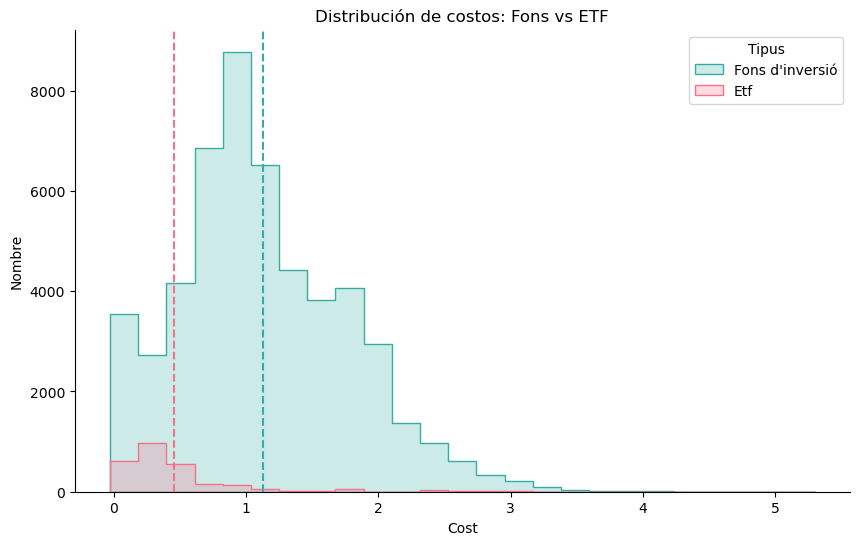

In [8]:
# Histograma
plt.figure(figsize=(10, 6))
g = sns.histplot(data=morningstar, x='ongoing_cost', hue='type', bins=25, kde=False, palette='husl', element='step', fill=True)
plt.xlabel('Cost')
plt.ylabel('Nombre')
plt.title('Distribución de costos: Fons vs ETF')
sns.despine()
plt.grid(False)

# Mitjana
mean_funds = np.nanmean(morningstar[morningstar['type'] == 'funds']['ongoing_cost'])
mean_etf = np.nanmean(morningstar[morningstar['type'] == 'etf']['ongoing_cost'])
print('Mitjana dels costos de gestió')
print(f'Fons d\'inversió: {np.round(mean_funds, 2)}')
print(f'ETFs: {np.round(mean_etf, 2)}')

colors = sns.color_palette('husl', len(morningstar['type'].unique()))

plt.axvline(mean_funds, color=colors[1], linestyle='--', label='Mediana - Fons d\'inversió')
plt.axvline(mean_etf, color=colors[0], linestyle='--', label='Mediana - ETF')

# Etiquetes
etiquetes = ['Fons d\'inversió', 'Etf']
plt.legend(title='Tipus', labels=etiquetes, loc='best')

plt.show()

La diferència entre els costos de gestió és molt notable. De fet, és del més del doble en els fons d'inversió respecte els ETFs. A més, aquí no estem diferenciant entre els fons d'inversió activa i passiva. Aquests últims, el seus costos de gestió s'apropen als del ETF.

##### II. Rendibilitat

##### ETF vs FONS

Mitjana de la Rendibilitat a 3 anys
Fons 3.75
etf 3.23
Fons/etf 1.16
-----
Mitjana de la Rendibilitat a 5 anys
Fons 8.2
etf 7.62
Fons/etf 1.08
-----
Mitjana de la Rendibilitat a 10 anys
Fons 6.32
etf 4.11
Fons/etf 1.54
-----


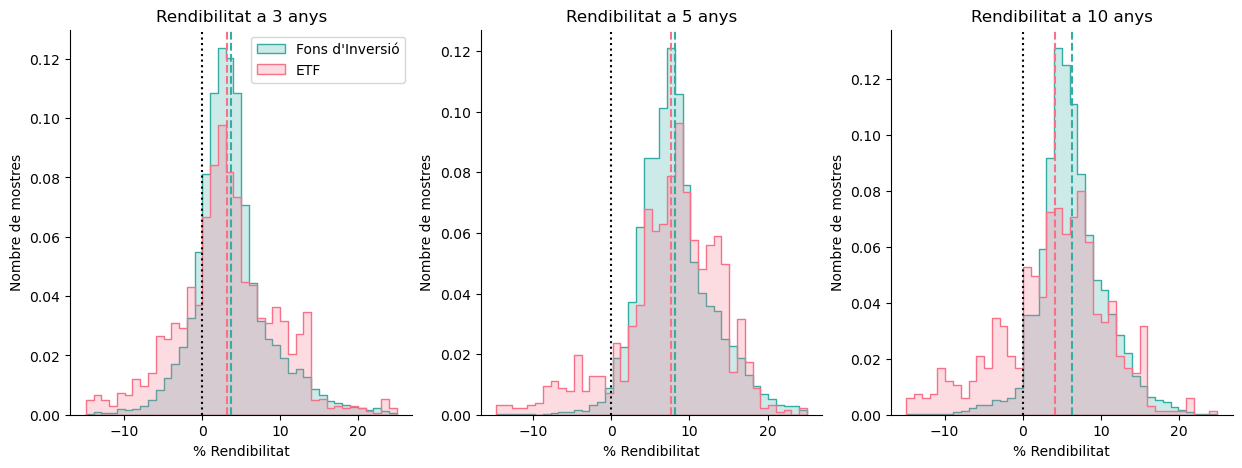

In [9]:
var_list = ['fund_trailing_return_3years', 'fund_trailing_return_5years', 'fund_trailing_return_10years']
title_list = ['Rendibilitat a 3 anys', 'Rendibilitat a 5 anys', 'Rendibilitat a 10 anys']

# Rang a mostrar
valor_minim = -15
valor_maxim = 25

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(var_list)):
    var = var_list[i]
    title = title_list[i]
    
    morningstar_fil = morningstar[(morningstar[var] >= valor_minim) & (morningstar[var] <= valor_maxim)]

    # Histograma
    g = sns.histplot(data=morningstar_fil, x=var, hue='type', bins=40, kde=False, stat= 'density', palette='husl', element='step', common_norm=False, ax=axes[i])
    axes[i].set_xlabel('% Rendibilitat')
    axes[i].set_ylabel('Nombre de mostres')
    axes[i].set_title(title)
    sns.despine(ax=axes[i])
    axes[i].grid(False)

    # Mitjana
    mean_funds = np.nanmean(morningstar_fil[morningstar_fil['type'] == 'funds'][var])
    mean_etf = np.nanmean(morningstar_fil[morningstar_fil['type'] == 'etf'][var])
    print(f'Mitjana de la {title}')
    print(f'Fons {np.round(mean_funds, 2)}')
    print(f'etf {np.round(mean_etf,2 )}')
    print(f'Fons/etf {np.round(mean_funds/mean_etf, 2)}')
    print('-----')

    colors = sns.color_palette('husl', len(morningstar_fil['type'].unique()))

    axes[i].axvline(mean_funds, color=colors[1], linestyle='--', label='Mediana - Fons d\'inversió')
    axes[i].axvline(mean_etf, color=colors[0], linestyle='--', label='Mediana - ETF')
    
    # Línea vertical en 0
    axes[i].axvline(0, color='black', linestyle=':', label='0')

    # Etiquetes
    if i == 0:
        etiquetas = ['Fons d\'Inversió', 'ETF']
        axes[i].legend(title='', labels=etiquetas, loc='best')
    else:
        axes[i].legend().remove() 

plt.show()

En general, mostren una rendibilitat bastant pareguda, amb una corba de distribució que sobretot difereixen en la cua esquerra. És a dir, veiem l'efecte dels gestors que poden ser capaços de reduir les pèrdues quan un mercat concret es comporta malament, cosa que els etfs no poden fer. La mitjana s'indica per cada producte i és bastant pareguda, a favor dels fons d'inversió en la rendibilitat a deu anys. De totes maneres, cal dir que hi ha estudis que mostren que a la llarga els fons d'inversió de gestió activa no solen ser capaços de batre al mercat. Sobretot, per les comissions.(https://www.spglobal.com/spdji/en/research-insights/spiva/)

##### Anualitzada

In [10]:
premelt = morningstar[['type', 'fund_return_2015', 'fund_return_2016', 'fund_return_2017', 'fund_return_2018', 'fund_return_2019']].rename(columns={'fund_return_2015': '2015', 'fund_return_2016': '2016', 'fund_return_2017': '2017', 'fund_return_2018': '2018', 'fund_return_2019': '2019'})
returns = premelt.melt(id_vars='type', var_name='year', value_name='return')

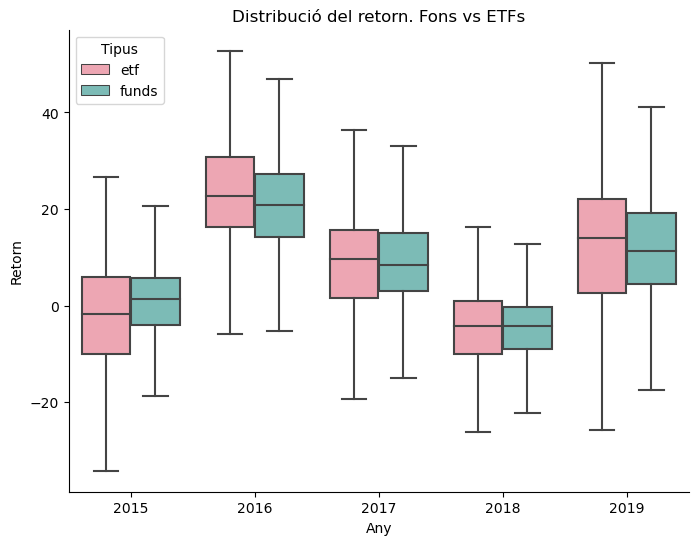

In [11]:
# Preparar dades
premelt = morningstar[['type', 'fund_return_2015', 'fund_return_2016', 'fund_return_2017', 'fund_return_2018', 'fund_return_2019']].rename(columns={'fund_return_2015': '2015', 'fund_return_2016': '2016', 'fund_return_2017': '2017', 'fund_return_2018': '2018', 'fund_return_2019': '2019'})
returns = premelt.melt(id_vars='type', var_name='year', value_name='return')

# Box-plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='year', y='return', hue='type', hue_order=['etf', 'funds'], data=returns, showfliers=False, palette='husl')

# Transparència a les caixes
alpha = 0.7
for i, artist in enumerate(plt.gca().artists):
    color = artist.get_facecolor()
    artist.set_facecolor((color[0], color[1], color[2], alpha))

for i, patch in enumerate(plt.gca().patches):
    color = patch.get_facecolor()
    patch.set_facecolor((color[0], color[1], color[2], alpha))

sns.despine()
plt.xlabel('Any')
plt.ylabel('Retorn')
plt.title('Distribució del retorn. Fons vs ETFs')
plt.legend(title='Tipus', loc='best')
plt.grid(False)

plt.show()


Es comprova perfectament com evoluciona la rendibilitat de forma conjunta en els dos productes però la dispersió de les dades es major per als etfs que mostren un rang interquartilic, a voltes, de quasi el doble que dels fons.

#### c. Categories

##### i. Categories més freqüents

In [12]:
cat_etf = etf_sel['category']
cat_counts_etf = cat_etf.value_counts().sort_values(ascending=False)[:10]
cat_table_etf = pd.DataFrame({'Categoria ETFs': cat_counts_etf.index, 'Nombre de ETFs': cat_counts_etf.values})
cat_table_etf = cat_table_etf.reset_index(drop=True)

cat_fund = funds_sel['category']
cat_counts_fund = cat_fund.value_counts().sort_values(ascending=False)[:10]
cat_table_fund = pd.DataFrame({'Categoria Fons': cat_counts_fund.index, 'Nombre de Fons': cat_counts_fund.values})
cat_table_fund = cat_table_fund.reset_index(drop=True)

cat_table = pd.concat([cat_table_etf, cat_table_fund], axis=1)

print(tabulate(cat_table, headers='keys', tablefmt='grid'))

+----+------------------------------------+------------------+---------------------------------------+------------------+
|    | Categoria ETFs                     |   Nombre de ETFs | Categoria Fons                        |   Nombre de Fons |
+====+====================================+==================+=======================================+==================+
|  0 | Other Equity                       |              264 | Other Bond                            |             3928 |
+----+------------------------------------+------------------+---------------------------------------+------------------+
|  1 | Other Bond                         |              142 | Other Equity                          |             3552 |
+----+------------------------------------+------------------+---------------------------------------+------------------+
|  2 | US Large-Cap Blend Equity          |              135 | Global Emerging Markets Equity        |             1884 |
+----+------------------

Les categories més frequënts són calaixos de sastre per als fons que se centren en la renda fixa (Bonds) o la Renta Variable (Equitiy). Però podem veure com les categories solen descriure a més d'açò, altres aspectes importants com l'exposició geogràfica (US, global o emerging per exemple), la divisa de les inversions (GBP), el caràcter de la inversió (Moderatly Adventurous).

##### ii. Supracategories

El camp categoría sembla que conté un gran nombre de diferents categories. Podem simplificar agrupant-los en supra_categories segons en que inverteixen principalment cada fons.

**Renta Variable**: Inverteixen principalment en accions d'empreses \
**Renta Fixa**: Deute pública o privada. \
**Commodities**: Matèries Primeres\
**Mixtes**: Combinen la inversió en renda fixa i variable, bé amb uns percentatges determinats o de manera flexible\
**Monetaris**: Inversió en renda fixa a curt termini. Es diferencien perquè se sol considerar els instruments més conservadors i segurs i s'assimilen a tindre els diners disponibles però oferint una rendibilitat.\
**Immobles**: Inverteixen en el mercat immobiliari\
**Alternatius**: Formes alternatives de inversió\
**Altres**: S'inclouen categories de fons amb poca representació que inclouen els fons que garanteixen part o tot del capital invertit, els fons amb una data objectiu.\

In [13]:
categories = [
    ('Equity|Large Value|Europe Stock|Foreign Large Blend|China Region|World Large Stock', 'Renta Variable'),
    ('Bond', 'Renta Fixa'),
    ('Commodities', 'Commodities'),
    ('Allocation', 'Mixtes'),
    ('Alt|Multialternative|Trading', 'Alternatius'),
    ('Money Market', 'Monetaris'),
    ('Property', 'Immobles'),
    ('Capital Protected|Guaranteed Funds|Other|Target Date', 'Altres')
]

# Emmagatzema les categories en supracategories
category_dict = {}

for keywords, category_name in categories:
    search = morningstar['category'].str.contains(keywords)
    category_dict[category_name] = morningstar[search]['category'].unique()
    
# Incloem les supracategories dintre del dataframe
def get_supracategory(category):
    for supracategory, categories in category_dict.items():
        if category in categories:
            return supracategory
    return 'Other'

morningstar['supracategory'] = morningstar['category'].apply(get_supracategory)

In [14]:
morningstar['supracategory'].unique()

array(['Renta Variable', 'Renta Fixa', 'Immobles', 'Commodities',
       'Monetaris', 'Alternatius', 'Mixtes', 'Altres'], dtype=object)

Vegem com es distribueixen els fons segons les supracategories

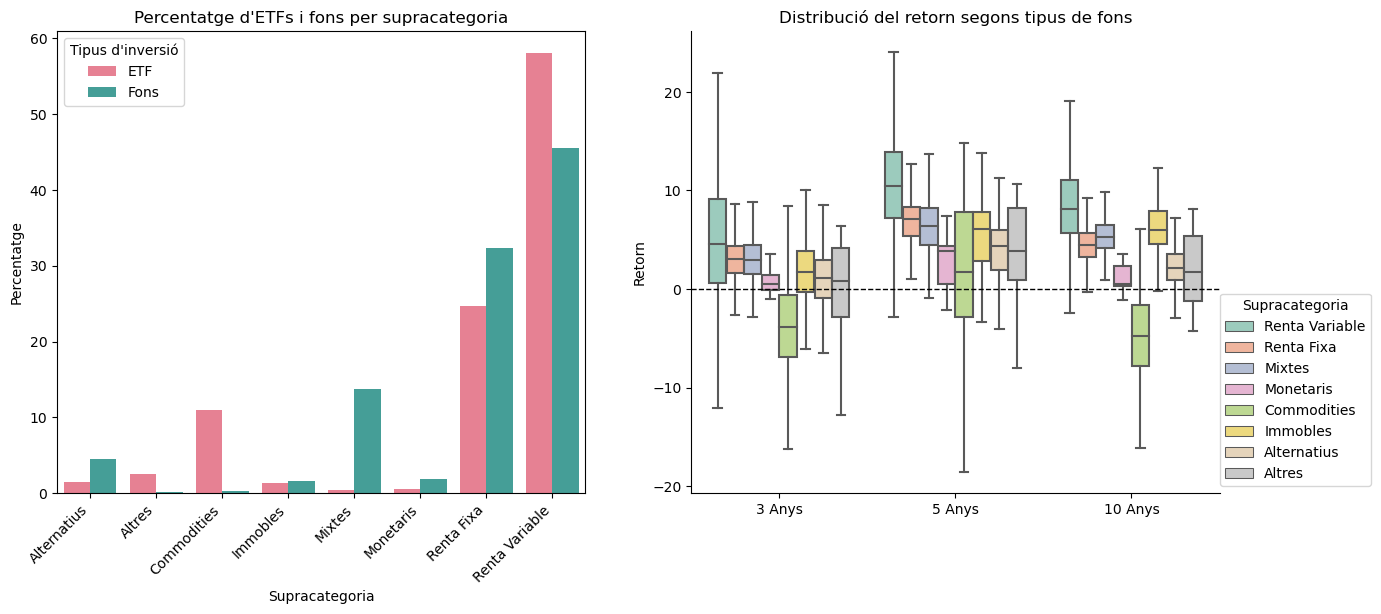

In [15]:
from pandas.api.types import CategoricalDtype


# Preparació dades gràfic de barres
search_etf = morningstar['type'] == 'etf'
subset_etf = morningstar[search_etf]

search_funds = morningstar['type'] == 'funds'
subset_funds = morningstar[search_funds]

supracategory_percent_etf = (subset_etf.groupby('supracategory').size() / len(subset_etf)) * 100
supracategory_percent_funds = (subset_funds.groupby('supracategory').size() / len(subset_funds)) * 100

colors = sns.color_palette('husl', len(morningstar_fil['type'].unique()))

data_perc = pd.DataFrame({'Percentatge': supracategory_percent_etf, 'Tipus d\'inversió': 'ETF'})
data_perc = data_perc.append(pd.DataFrame({'Percentatge': supracategory_percent_funds, 'Tipus d\'inversió': 'Fons'}))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))

# Gràfic de barres
sns.set_palette('husl')
sns.barplot(ax=ax1, data=data_perc, x=data_perc.index, y='Percentatge', hue='Tipus d\'inversió', palette=colors)
ax1.set_title('Percentatge d\'ETFs i fons per supracategoria')
ax1.set_xlabel('Supracategoria')
ax1.set_ylabel('Percentatge')
ax1.legend(title='Tipus d\'inversió')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Preparar dades
supracategory_order = ['Renta Variable', 'Renta Fixa', 'Mixtes', 'Monetaris', 'Commodities', 'Immobles', 'Alternatius', 'Altres']
premelt = morningstar[['supracategory', 'fund_trailing_return_3years', 'fund_trailing_return_5years', 'fund_trailing_return_10years']].rename(columns={'fund_trailing_return_3years': 'return_3years', 'fund_trailing_return_5years': 'return_5years','fund_trailing_return_10years': 'return_10years'})
returns = premelt.melt(id_vars='supracategory', var_name='period', value_name='return')
returns['supracategory'] = returns['supracategory'].astype(CategoricalDtype(categories=supracategory_order, ordered=True))

# Box-Plot
colors = sns.color_palette('Set2', n_colors=len(supracategory_order))
sns.boxplot(ax=ax2, x='period', y='return', hue='supracategory', data=returns, showfliers=False, palette=colors)
alpha = 0.7
for i, artist in enumerate(ax2.artists):
    color = artist.get_facecolor()
    artist.set_facecolor((color[0], color[1], color[2], alpha))
for i, patch in enumerate(ax2.patches):
    color = patch.get_facecolor()
    patch.set_facecolor((color[0], color[1], color[2], alpha))
ax2.axhline(y=0, color='black', linewidth=1, linestyle='--')
sns.despine(ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Retorn')
ax2.set_title('Distribució del retorn segons tipus de fons')
ax2.legend(title='Supracategoria', bbox_to_anchor=(1.3, 0), loc='lower right')
ax2.grid(False)
ax2.set_xticks(ticks=[0, 1, 2], labels=["3 Anys", "5 Anys", "10 Anys"])

# Mostrar les figures
plt.show()


Observem que la major part dels fons i etfs es troben enmarcats en les categories de Renta Variable i Renta Fixa. La categoria de mixtes es dona principalment en fons d'inversió mentre que els de materies primes ho és en ETFs.

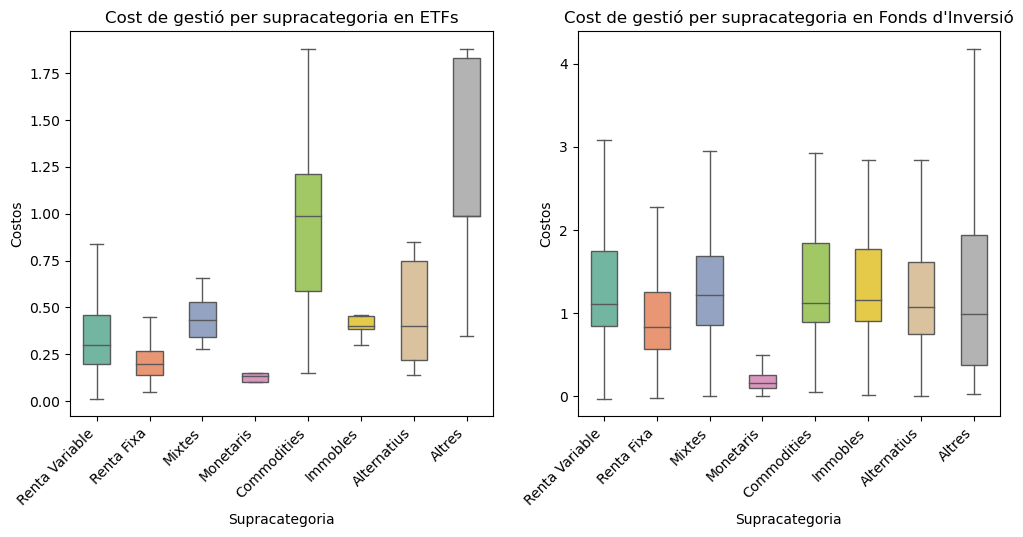

In [16]:
search = morningstar['type'] == 'etf'
subset = morningstar[search]

# Crear l'ordre desitjat de les categories
supracategory_order = ['Renta Variable', 'Renta Fixa', 'Mixtes', 'Monetaris', 'Commodities', 'Immobles', 'Alternatius', 'Altres']

colors = sns.color_palette('Set2', n_colors=len(supracategory_order))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x='supracategory', y='ongoing_cost', data=subset, showfliers=False, palette=colors, width=0.5, linewidth=1, ax=axs[0], order=supracategory_order) # Dibuixar el primer gràfic al primer subplot
axs[0].set_xlabel('Supracategoria')
axs[0].set_ylabel('Costos')
axs[0].set_title('Cost de gestió per supracategoria en ETFs')

search = morningstar['type'] == 'funds'
subset = morningstar[search]

sns.boxplot(x='supracategory', y='ongoing_cost', data=subset, showfliers=False, palette=colors, width=0.5, linewidth=1, ax=axs[1], order=supracategory_order) # Dibuixar el segon gràfic al segon subplot
axs[1].set_xlabel('Supracategoria')
axs[1].set_ylabel('Costos')
axs[1].set_title('Cost de gestió per supracategoria en Fonds d\'Inversió')

axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')


plt.show()

Tant en els fons d'inversió com en els etfs , els que tenen menys cost de gestió son els monetaris, deuda pública a molt curt termini. Com solen tindre menys rendibilitat, les comisions han de ser més ajustades. També la resta de fons de renda fixa tenen comisions més baixes, per un motiu similar, tot i amb una dispersió molt més grans que els monetaris. Això sol dependre de si son fons de renda fixa de més curta durada o més llarga o d'una gestió activa que varia la durada i els tipus segons la situació económica. En els etfs, les comisions dels fons de matèries primeres és molt elevada en eles etfs però en general, són els fons de renda variable i mixta els que tenen més comisions.

#### d. Inversions sostenibles

Comprovem ara quin és el nivell de compromís en inversió sostenible tenen els diferents fons. La puntuació de sostenibilitat pot ser de màxim 50 punts i, a més puntuació, menys sostenibles són les inversions. S'obté amb la suma de les puntuacions ambientals, socials i bon govern, però també pot haver puntuació no adscrita a cap d'aquests tres factors. S'han detectat algunes puntuacions d'aquests factors superiors a 50 (impossible) i s'han eliminat. Malauradament, en el dataset no tenim les dades de la puntuació no adscrita.

##### Depuració dades errònies

In [17]:
search = morningstar['environmental_score'] > 30
searched = morningstar[search]

searched[['isin', 'environmental_score', 'social_score', 'governance_score', 'sustainability_score']]

,isin,environmental_score,social_score,governance_score,sustainability_score
403,FR0010655712,62.70,63.68,59.07,55.91
13775,LU0274383693,52.59,53.74,56.36,50.44
13777,LU0278409221,53.12,48.83,53.01,49.50
13778,LU0278409577,49.52,52.17,52.93,44.56
13779,LU0278409734,49.25,49.67,46.69,43.42
...,...,...,...,...,...
65332,LU0196878994,47.43,45.64,45.27,41.83
65346,LU0149827361,60.18,61.28,58.44,52.59
65389,LU0196876865,48.00,49.54,48.98,44.50
66119,IE0031655198,53.74,52.71,52.56,47.78


També cal afegir que, una part de la puntuació total de la sostenibilitat pot estar no adscrita als factors ambientals, socials o de bon govern. Per comprovar quin efecte pot tindre aquesta puntuació no adscrita, calcularem nosaltres mateixos una puntuació de sostenibilitat calculada.

In [18]:
var_list = ['environmental_score', 'social_score', 'governance_score']

excess_score = morningstar[var_list[0]] > 25
rows_to_drop = morningstar[excess_score]
print(len(rows_to_drop))
morningstar_egs = morningstar[~excess_score]

excess_score = morningstar_egs[var_list[1]] > 25
rows_to_drop = morningstar_egs[excess_score]
print(len(rows_to_drop))
morningstar_egs = morningstar_egs[~excess_score]

excess_score = morningstar_egs[var_list[2]] > 25
rows_to_drop = morningstar_egs[excess_score]
print(len(rows_to_drop))
morningstar_egs = morningstar_egs[~excess_score]

morningstar_egs['sustainability_score_calculated'] = morningstar_egs['environmental_score'] + morningstar_egs['social_score'] + morningstar_egs['governance_score']

morningstar_egs['sustainability_score_dif'] = morningstar_egs['sustainability_score']-morningstar_egs['sustainability_score_calculated']
morningstar_egs[morningstar_egs['sustainability_score_dif'] > 1][['type','environmental_score', 'social_score', 'governance_score','sustainability_score', 'sustainability_score_calculated', 'sustainability_score_dif']]

156
0
0


,type,environmental_score,social_score,governance_score,sustainability_score,sustainability_score_calculated,sustainability_score_dif
18,etf,5.12,9.62,7.72,23.59,22.46,1.13
38,etf,4.48,9.38,7.19,22.79,21.05,1.74
60,etf,2.83,3.93,5.26,14.75,12.02,2.73
67,etf,4.81,8.44,7.26,21.85,20.51,1.34
74,etf,4.60,8.91,8.15,25.06,21.66,3.40
...,...,...,...,...,...,...,...
67065,funds,4.78,7.66,5.95,22.87,18.39,4.48
67066,funds,4.78,7.66,5.95,22.87,18.39,4.48
67074,funds,5.36,9.37,7.20,23.62,21.93,1.69
67075,funds,5.36,9.37,7.20,23.62,21.93,1.69


##### Puntuació ambiental, social i de bon govern

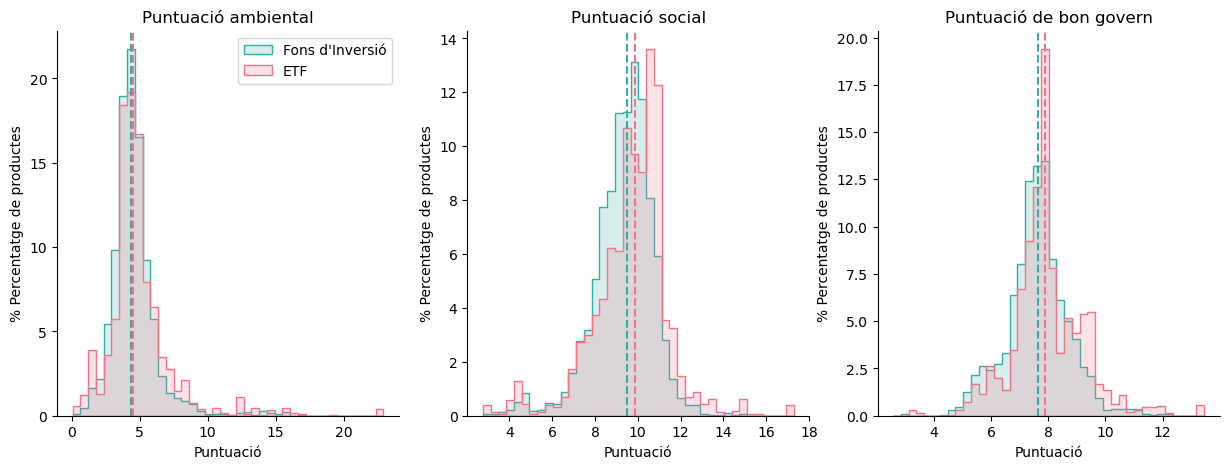

In [19]:
var_list = ['environmental_score', 'social_score', 'governance_score']
title_list = ['Puntuació ambiental', 'Puntuació social', 'Puntuació de bon govern']


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(var_list)):
    var = var_list[i]
    title = title_list[i]

    # Histograma
    g = sns.histplot(data=morningstar_egs, x=var, hue='type', bins=40, kde=False, stat= 'percent', palette='husl', element='step', common_norm=False, ax=axes[i], alpha=0.2)
    axes[i].set_xlabel('Puntuació')
    axes[i].set_ylabel('% Percentatge de productes')
    axes[i].set_title(title)
    sns.despine(ax=axes[i])
    axes[i].grid(False)

    # Mediana
    mean_etf = np.nanmedian(morningstar_egs[morningstar_egs['type'] == 'etf'][var])
    mean_funds = np.nanmedian(morningstar_egs[morningstar_egs['type'] == 'funds'][var])

    colors = sns.color_palette('husl', len(morningstar_egs['type'].unique()))

    axes[i].axvline(mean_etf, color=colors[0], linestyle='--', label='Mediana - ETF')
    axes[i].axvline(mean_funds, color=colors[1], linestyle='--', label='Mediana - Fons d\'inversió')

    # Etiqueta
    if i == 0:
        etiquetas = ['Fons d\'Inversió', 'ETF']
        axes[i].legend(title='', labels=etiquetas, loc='best')
    else:
        axes[i].legend().remove() 

plt.show()

Entre els ETF i els fons d'inversió, la puntuació és molt similar però tendeixen a tindre millor puntuació els fons d'inversió. Sobretot en el àmbit social.

##### Puntuació sostenibilitat

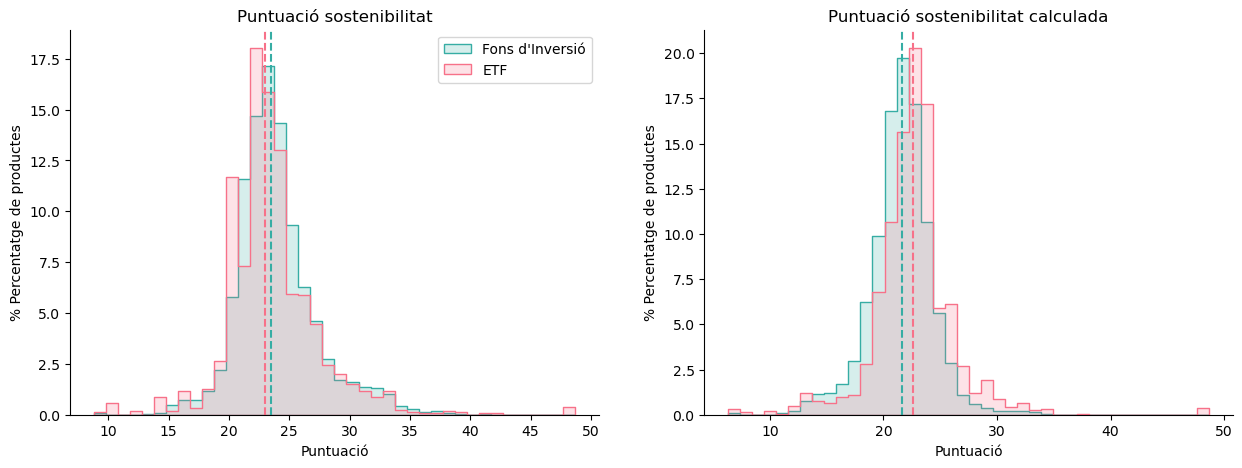

In [20]:
var_list = ['sustainability_score', 'sustainability_score_calculated']
title_list = ['Puntuació sostenibilitat', 'Puntuació sostenibilitat calculada']


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i in range(len(var_list)):
    var = var_list[i]
    title = title_list[i]

    # Histograma
    g = sns.histplot(data=morningstar_egs, x=var, hue='type', bins=40, kde=False, stat= 'percent', palette='husl', element='step', common_norm=False, ax=axes[i], alpha=0.2)
    axes[i].set_xlabel('Puntuació')
    axes[i].set_ylabel('% Percentatge de productes')
    axes[i].set_title(title)
    sns.despine(ax=axes[i])
    axes[i].grid(False)

    # Mediana
    mean_etf = np.nanmedian(morningstar_egs[morningstar_egs['type'] == 'etf'][var])
    mean_funds = np.nanmedian(morningstar_egs[morningstar_egs['type'] == 'funds'][var])

    colors = sns.color_palette('husl', len(morningstar_egs['type'].unique()))

    axes[i].axvline(mean_etf, color=colors[0], linestyle='--', label='Mediana - ETF')
    axes[i].axvline(mean_funds, color=colors[1], linestyle='--', label='Mediana - Fons d\'inversió')

    # Etiqueta
    if i == 0:
        etiquetas = ['Fons d\'Inversió', 'ETF']
        axes[i].legend(title='', labels=etiquetas, loc='best')
    else:
        axes[i].legend().remove() 

plt.show()

Una menor puntuació correspon una millor sensibilitat de les inversions en cada un dels aspectes. Ambdós productes tenen un comportament ben similar, amb una mediana a favor dels fons en la majora d'aspectes. La puntuació de sostenibilitat s'obté sumant la ambiental, social i de bon govern. Però sol haver una petita puntuació no assignada a cap de les 3 categories i que no s'inclou en el dataset. En la puntuació total, s'inverteixen els resultats.

##### Sostenibilitat vs Rendibilitat

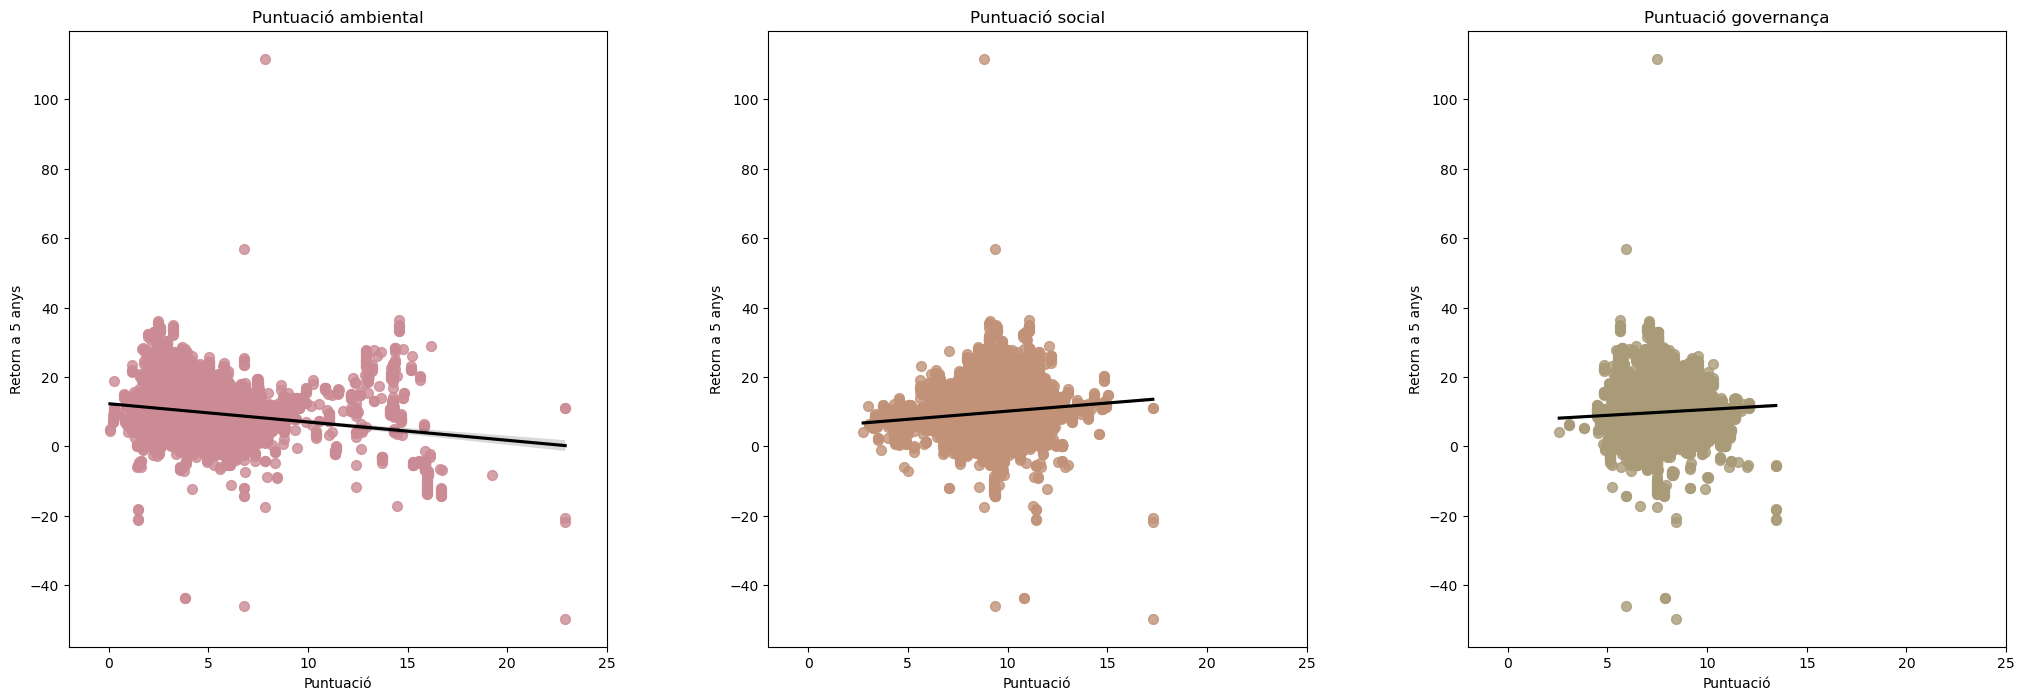

In [21]:
var_list = ['environmental_score', 'social_score', 'governance_score', 'sustainability_score']
title_list = ['Puntuació ambiental', 'Puntuació social', 'Puntuació governança', 'Puntuació sostenibilitat']

colors = sns.husl_palette(n_colors=11, s=.4)
sns.set_palette(colors)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

for i in range(1):
    for j in range(3):
        index = i * 3 + j
        if index < 11:
            sns.regplot(data=morningstar_egs, x=var_list[index], y='fund_trailing_return_5years', truncate=True, ax=ax.flat[index], color=colors[index], line_kws={'color':'black'}, scatter_kws={'alpha': 0.8, 's': 50})
            ax.flat[index].set_xlim(-2, 25)
            ax.flat[index].set(xlabel='Puntuació', ylabel='Retorn a 5 anys', title=title_list[index])

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


Es pot apreciar una lleugera correlació entre les puntuacions i les puntuacions de sostenibilitat. Menor rendibilitat en inversions amb més sensibilitat ambiental, però a pitjor amb més sensibilitat social.

#### e. Sectors i característiques de les inversions

Les diferències que hem vist en la sostenibilitat o la rendibiltiat pot estar molt influènciada segons el sector en què inverteix cada fons o etf

##### Rendav variable vs Rendibilitat

Dividirem primer el dataframe per estudiar per una banda les supracategories que inverteixen en renda variable (incloem per tant, també la supracategoria mixta, alternativa i altres).

Sectors = ('Materials Bàsics', 'Consum cíclic', 'Serveis financers', 'Immobles', 'Consum defensiu', 'Sanitat', 'Serveis públics', 'Comunicació', 'Energia', 'Industrial', 'Tecnologia')


In [22]:
# Molts fons i etfs no tenen dades en estes variables.
nan_percentages = morningstar.groupby('supracategory')[['sector_basic_materials', 'sector_consumer_cyclical', 'sector_financial_services', 'sector_real_estate', 'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities', 'sector_communication_services', 'sector_energy', 'sector_industrials', 'sector_technology']].apply(lambda x: (x.isna().all(axis=1).sum() / len(x)) * 100)
print(nan_percentages)

search = ['Renta Variable', 'Mixtes', 'Property', 'Alternatius', 'Altres']
sector_list = ['sector_basic_materials', 'sector_consumer_cyclical', 'sector_financial_services', 'sector_real_estate', 'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities', 'sector_communication_services', 'sector_energy', 'sector_industrials', 'sector_technology']

# Eliminem directament supracategories que no inverteixen en renda variable o tenim poques dades
morningstar_variable = morningstar_egs[morningstar_egs['supracategory'].isin(search)]
morningstar_variable = morningstar_variable.dropna(subset=sector_list, how='all')

nan_percentages = morningstar_variable.groupby('supracategory')[['sector_basic_materials', 'sector_consumer_cyclical', 'sector_financial_services', 'sector_real_estate', 'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities', 'sector_communication_services', 'sector_energy', 'sector_industrials', 'sector_technology']].apply(lambda x: (x.isna().all(axis=1).sum() / len(x)) * 100)
nan_percentages

supracategory
Alternatius       52.922591
Altres            45.283019
Commodities       72.113290
Immobles          19.204545
Mixtes             2.179981
Monetaris         99.901672
Renta Fixa        82.351984
Renta Variable     1.538230
dtype: float64


supracategory
Alternatius       0.0
Altres            0.0
Mixtes            0.0
Renta Variable    0.0
dtype: float64

En alguns casos hi han dades que semblen errònies al assignar un percentatge d'exposició superior al 100% i per tant, s'eliminen.

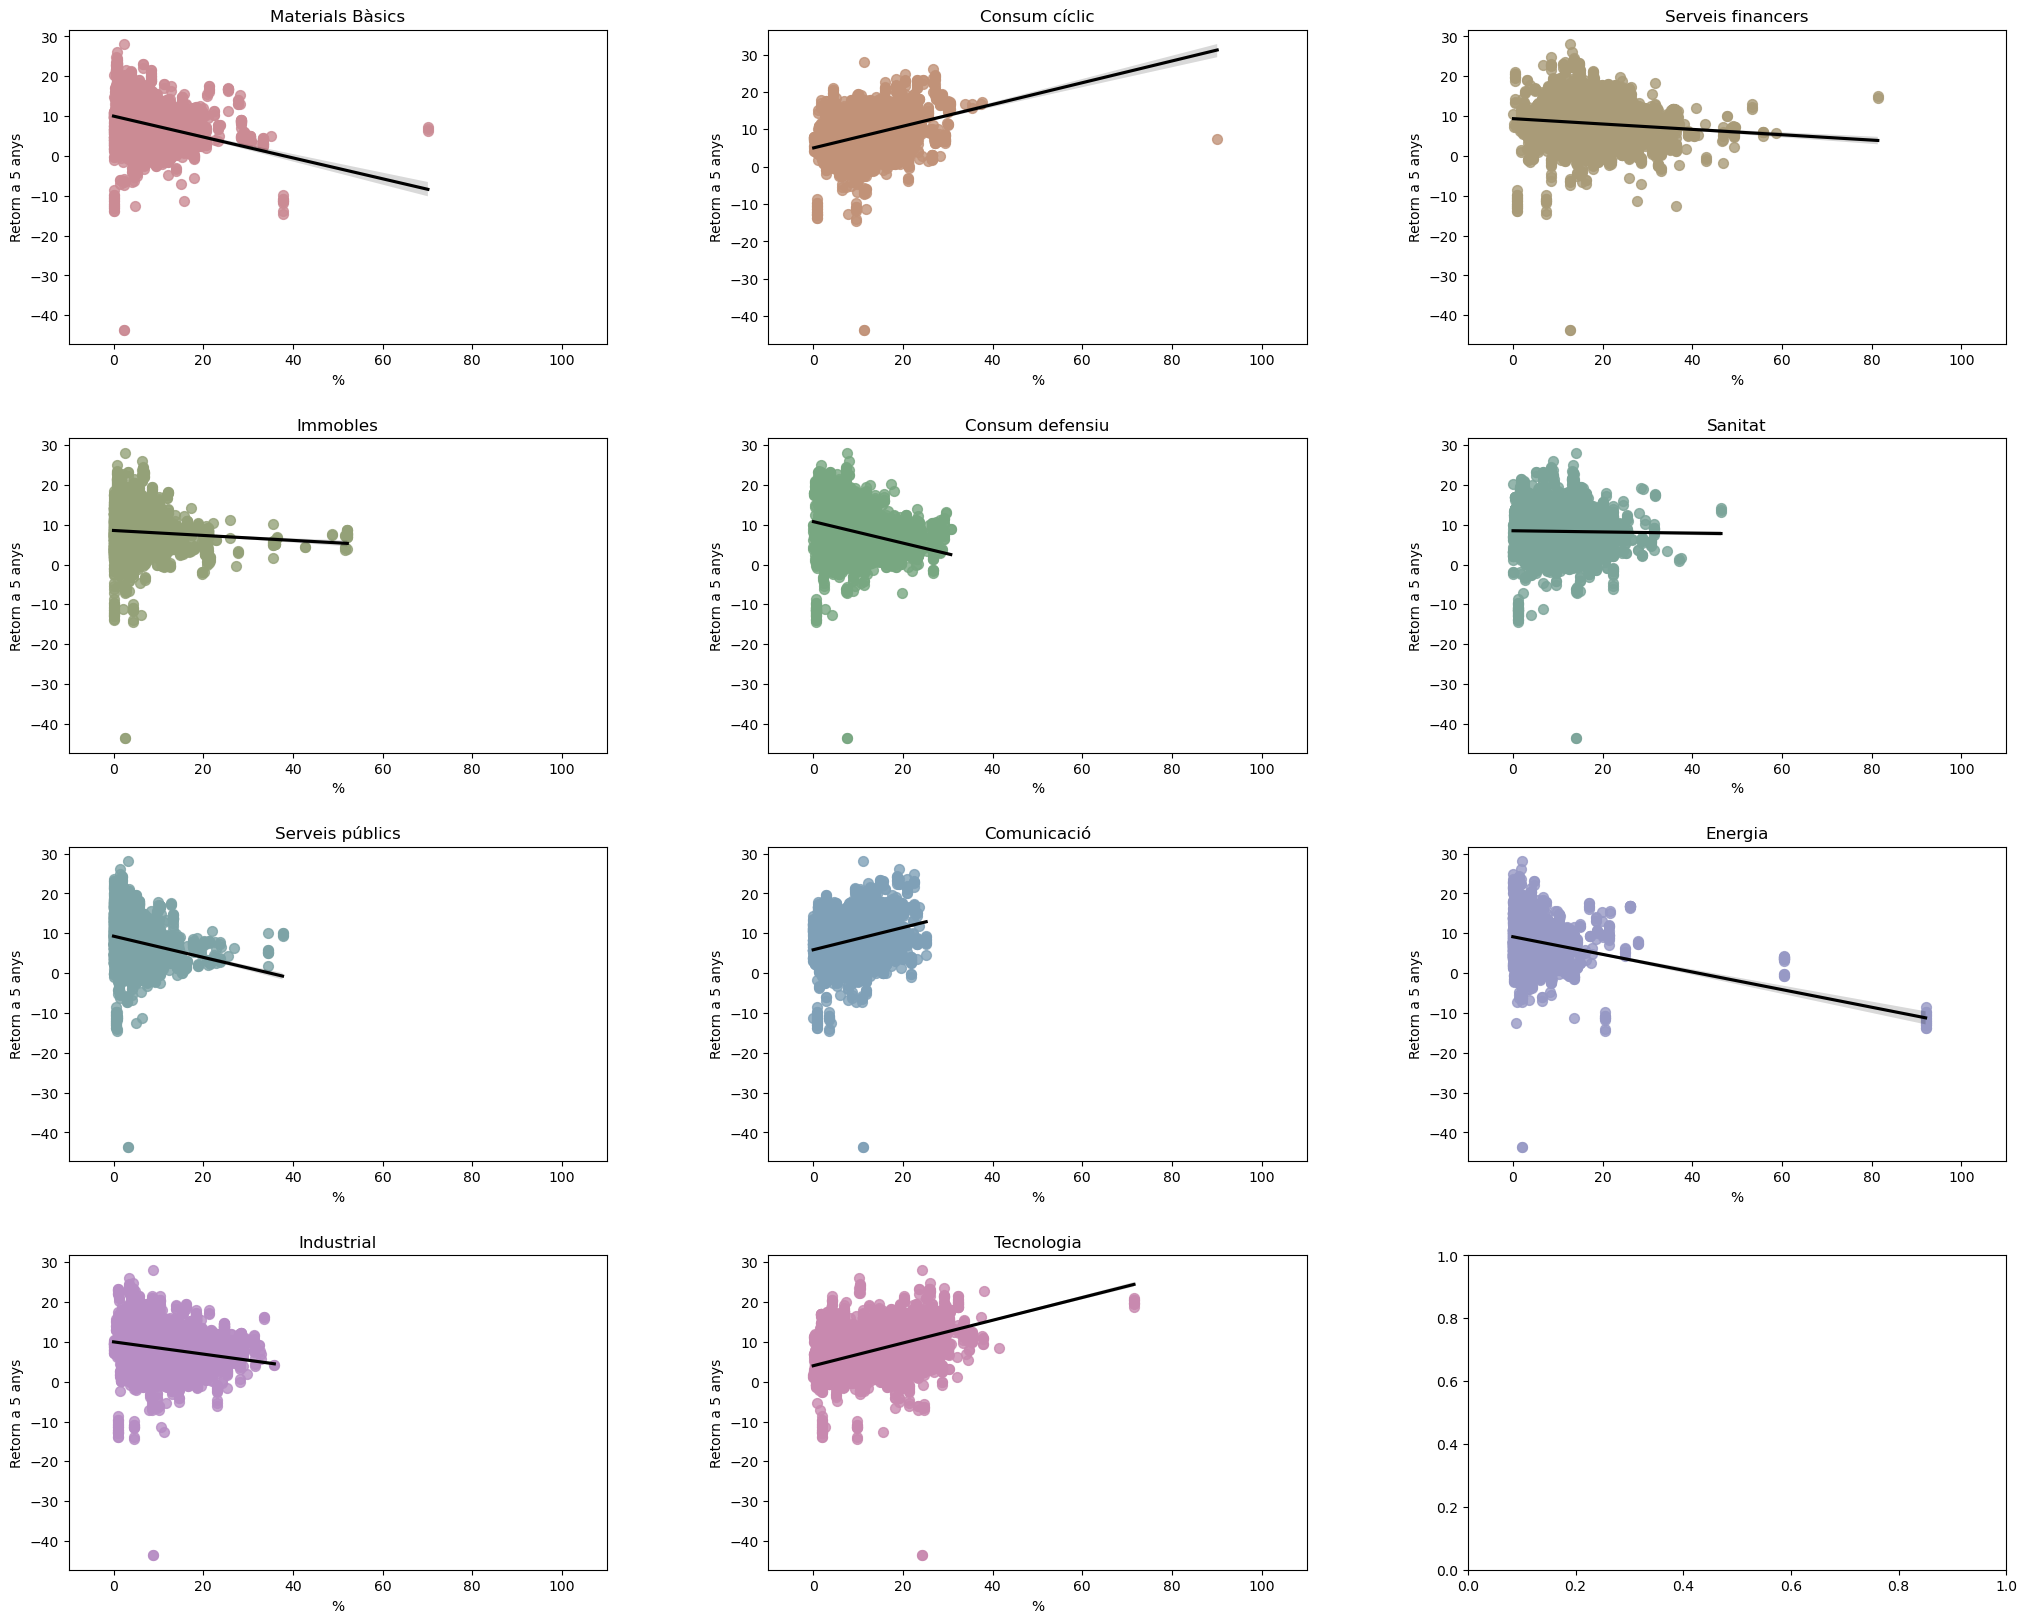

In [23]:
sector_list = ['sector_basic_materials', 'sector_consumer_cyclical', 'sector_financial_services', 'sector_real_estate', 'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities', 'sector_communication_services', 'sector_energy', 'sector_industrials', 'sector_technology']
title_list = ['Materials Bàsics', 'Consum cíclic', 'Serveis financers', 'Immobles', 'Consum defensiu', 'Sanitat', 'Serveis públics', 'Comunicació', 'Energia', 'Industrial', 'Tecnologia']
# Filtratge de dades
morningstar_f = morningstar_variable.query('sector_basic_materials >= 0 and sector_basic_materials <= 100')
morningstar_f = morningstar_f.query('sector_consumer_cyclical >= 0 and sector_consumer_cyclical <= 100')
morningstar_f = morningstar_f.query('sector_financial_services >= 0 and sector_financial_services <= 100')
morningstar_f = morningstar_f.query('sector_real_estate >= 0 and sector_real_estate <= 100')
morningstar_f = morningstar_f.query('sector_consumer_defensive >= 0 and sector_consumer_defensive <= 100')
morningstar_f = morningstar_f.query('sector_healthcare >= 0 and sector_healthcare <= 100')
morningstar_f = morningstar_f.query('sector_utilities >= 0 and sector_utilities <= 100')
morningstar_f = morningstar_f.query('sector_communication_services >= 0 and sector_communication_services <= 100')
morningstar_f = morningstar_f.query('sector_energy >= 0 and sector_energy <= 100')
morningstar_f = morningstar_f.query('sector_industrials >= 0 and sector_industrials <= 100')
morningstar_f = morningstar_f.query('sector_technology >= 0 and sector_technology <= 100')

colors = sns.husl_palette(n_colors=11, s=.4)
sns.set_palette(colors)

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(25, 20))

for i in range(4):
    for j in range(3):
        index = i * 3 + j
        if index < 11:
            sns.regplot(data=morningstar_f, x=sector_list[index], y='fund_trailing_return_5years', truncate=True, ax=ax[i][j], color=colors[index], line_kws={'color':'black'}, scatter_kws={'alpha': 0.8, 's': 50})
            ax[i][j].set_xlim(-10, 110)
            ax[i][j].set(xlabel='%', ylabel='Retorn a 5 anys', title=sector_list[index])
            ax[i][j].set_title(title_list[index])

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

S'observa una gran disparitat en els rendiments segons el percentatge de cada un dels sector en el fons o en el etf. Eixe caràcter pot estar fortament influenciat pel mercat, és a dir, el cicle econòmic que s'ha desenvolupat en eixos 5 anys, cap a on ha virat la econòmica (sectors emergents, per exemple), o per un mal comportament d'un sector en concret. Tecnologia és un dels sectors amb més rendiment, així com consum cíclic però d'altres com el de la salut no sembla influenciar gaire la rendibilitat. En concret, aquest últim sector se sol utilitzar com a un sector defensiu perquè és comporta millor en situacions de crisis.

##### Renda variable vs Sostenibiltiat

I la relació d'aquest sectors en funció de la puntuació de sostenibilitat?

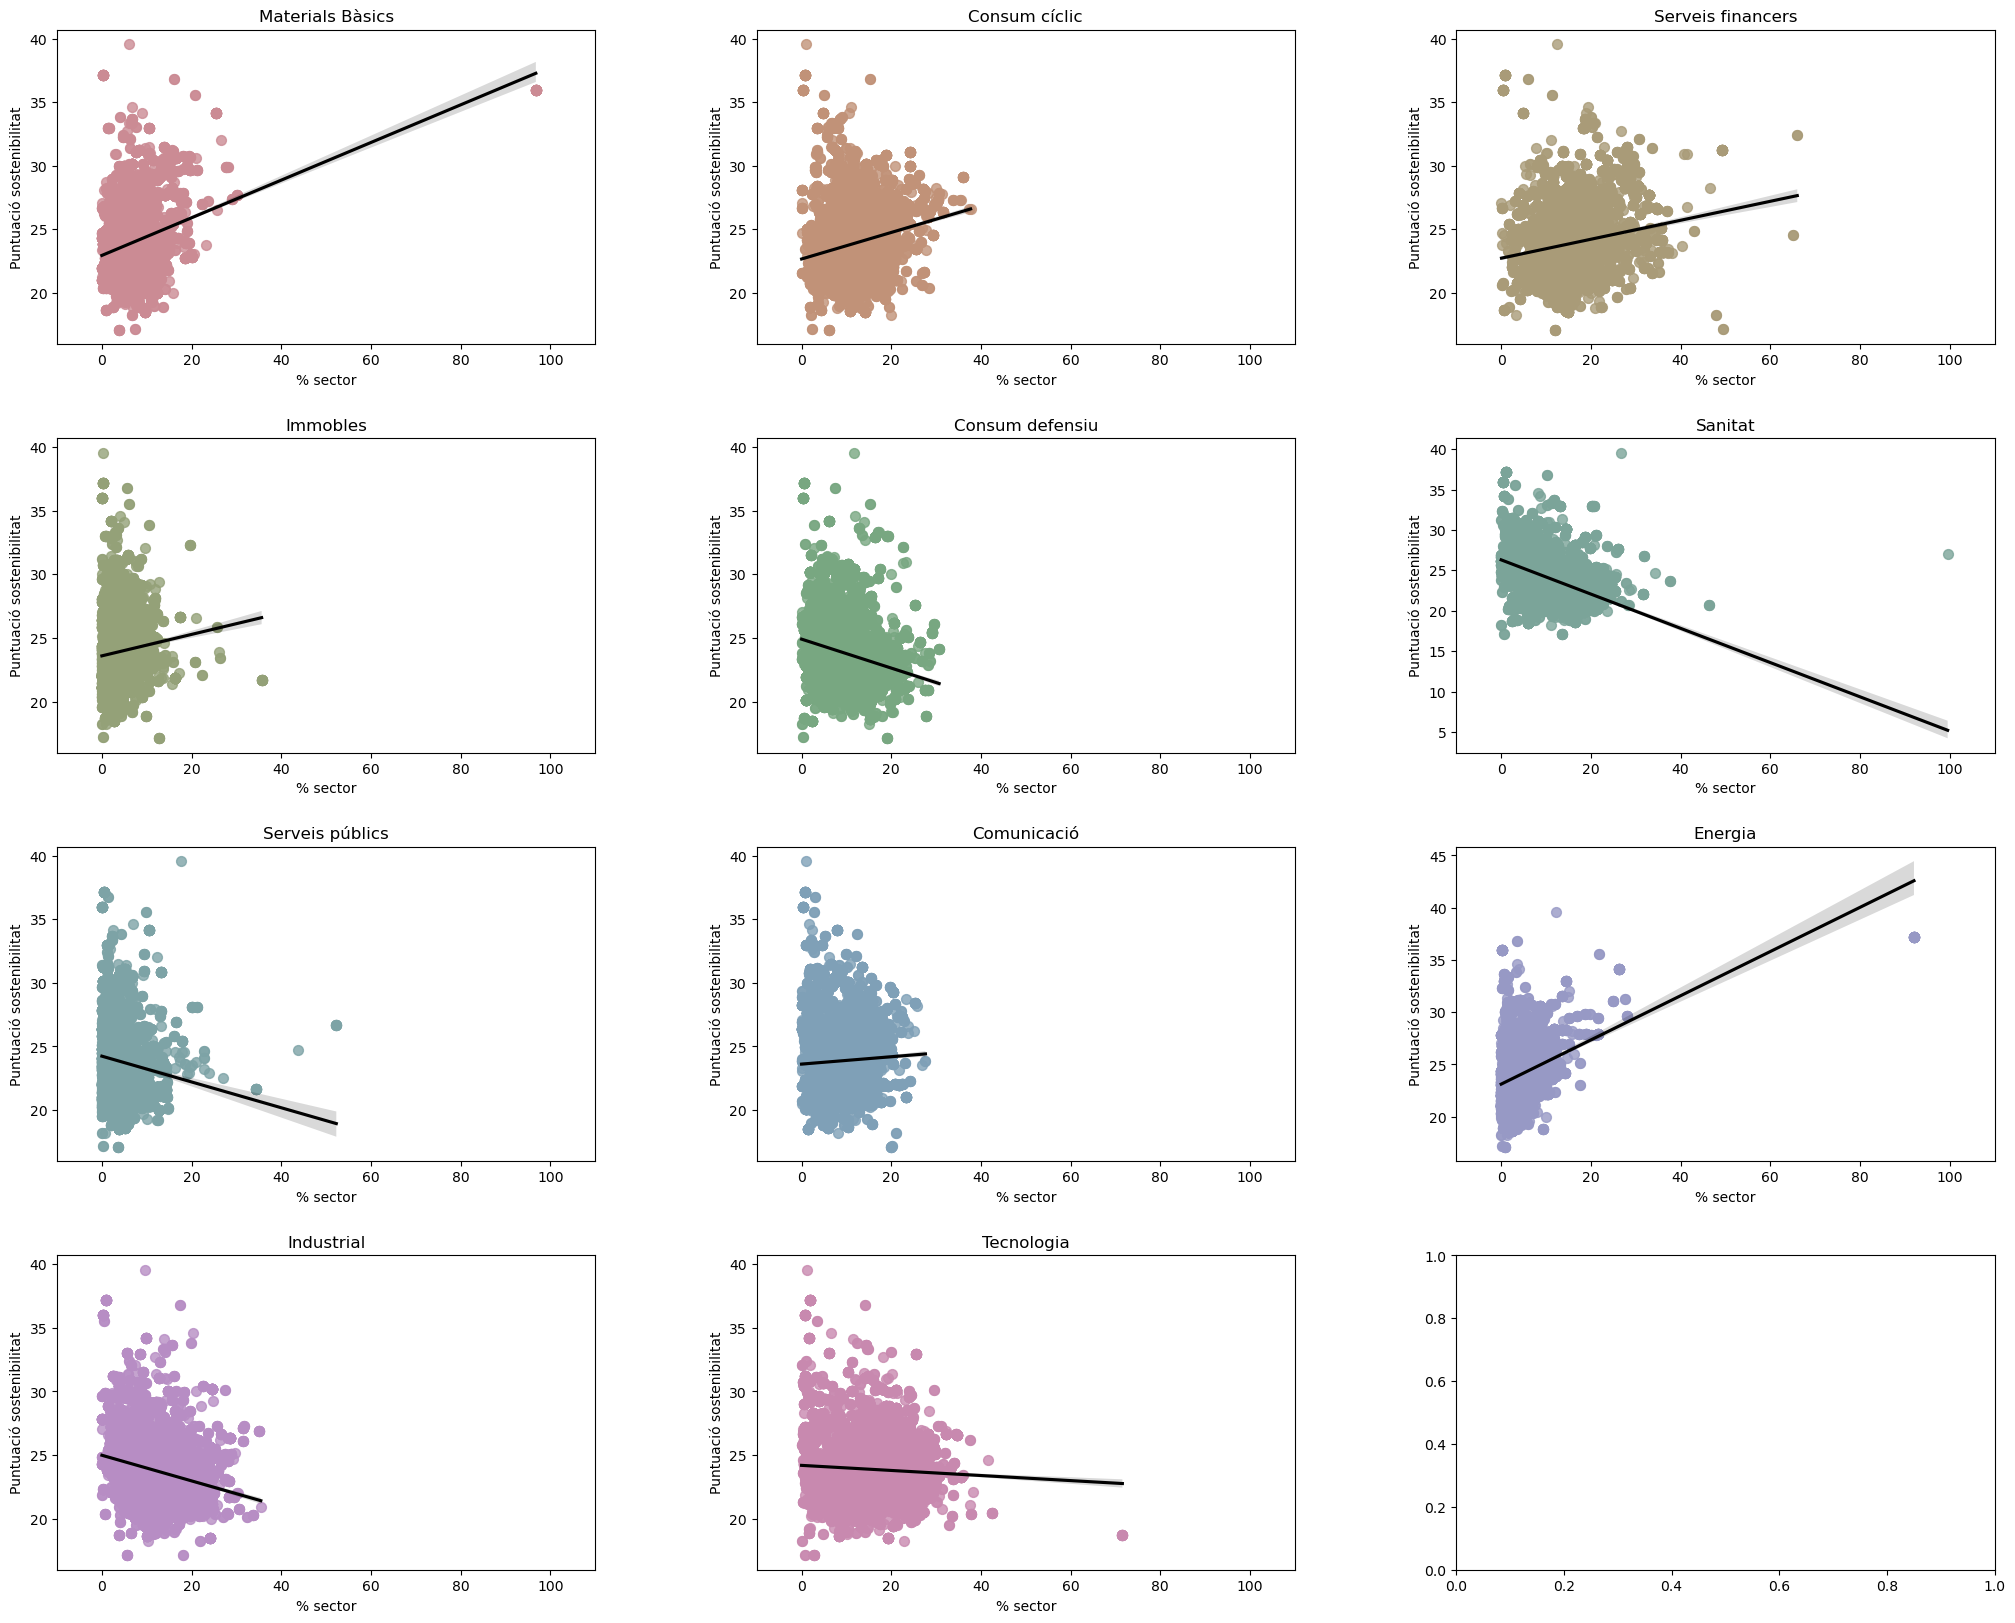

In [24]:
colors = sns.husl_palette(n_colors=11, s=.4) 
sns.set_palette(colors)

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(25, 20))


for i in range(4):
    for j in range(3):
        index = i * 3 + j
        if index < 11:
            sns.regplot(data=morningstar_f, x=sector_list[index], y='sustainability_score', truncate=True, ax=ax[i][j], color=colors[index], line_kws={'color':'black'}, scatter_kws={'alpha': 0.8, 's': 50})
            ax[i][j].set_xlim(-10, 110)
            ax[i][j].set(xlabel='% sector', ylabel='Puntuació sostenibilitat', title=sector_list[index])
            ax[i][j].set_title(title_list[index])

# Ajustar espaciament entre subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Mostrar el gràfic
plt.show()

Algunes sectors redueixen la puntuació en sostenibilitat (es a dir, més sostenibles):

- Consum defensiu
- Sanitat
- Serveis Públics
- Industries

Altres en canvi, l'increment en puntuació (és a dir, menys sostenibles), és notable:

- Energia
- Materials bàsics
- Serveis Financers

##### Capitalització borsatil vs Rendibilitat

Una altra forma de classificar l'exposició en empreses és segons la seva capitalització borsatil, que es el valor d'una empresa calculat a partir de la multiplicació de la cotització de les seves accions a la borsa pel nombre total d'accions. Una empresa amb gran capitalització borsatil podria ser Apple, mentre que una petita podria ser Prosegur.

In [25]:
market_cap = ['market_cap_giant', 'market_cap_large', 'market_cap_medium', 'market_cap_small', 'market_cap_micro']

In [26]:
market_cap = ['market_cap_giant', 'market_cap_large', 'market_cap_medium', 'market_cap_small', 'market_cap_micro']
nan_percentages = morningstar_variable.groupby('supracategory')[market_cap].apply(lambda x: (x.isna().all(axis=1).sum() / len(x)) * 100)
nan_percentages

morningstar_variable = morningstar_variable[morningstar_variable['supracategory'].isin(search)]
morningstar_variable = morningstar_variable.dropna(subset=sector_list, how='all')

nan_percentages = morningstar_variable.groupby('supracategory')[market_cap].apply(lambda x: (x.isna().all(axis=1).sum() / len(x)) * 100)
nan_percentages

supracategory
Alternatius       0.773196
Altres            0.000000
Mixtes            0.027274
Renta Variable    0.003843
dtype: float64

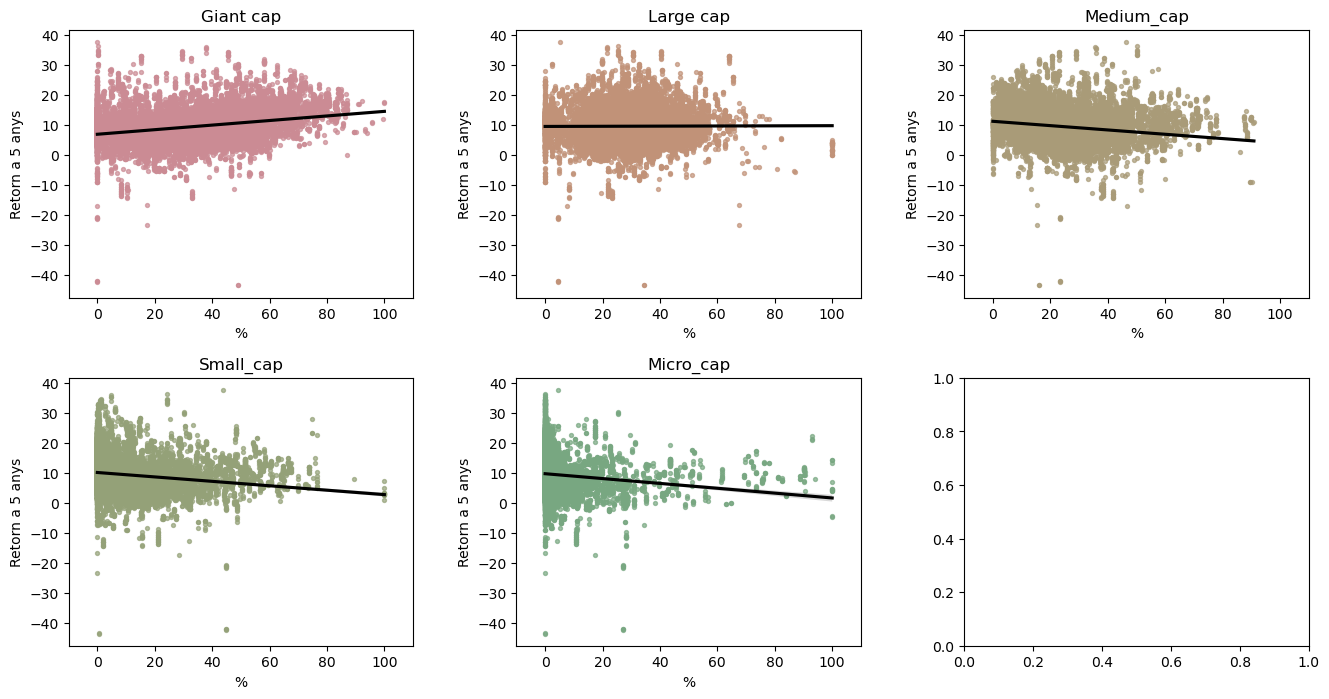

In [27]:
market_cap = ['market_cap_giant', 'market_cap_large', 'market_cap_medium', 'market_cap_small', 'market_cap_micro']
title_list = ['Giant cap', 'Large cap', 'Medium_cap', 'Small_cap', 'Micro_cap']
              
colors = sns.husl_palette(n_colors=11, s=.4)  # Utilitzar la paleta de colors HUSL de Seaborn amb saturació s = 0.4
sns.set_palette(colors)

# Filtratge de dades
morningstar_f = morningstar_variable.query('market_cap_giant >= 0 and market_cap_giant <= 100')
morningstar_f = morningstar_f.query('market_cap_large >= 0 and market_cap_large <= 100')
morningstar_f = morningstar_f.query('market_cap_medium >= 0 and market_cap_medium <= 100')
morningstar_f = morningstar_f.query('market_cap_small >= 0 and market_cap_small <= 100')
morningstar_f = morningstar_f.query('market_cap_micro >= 0 and market_cap_micro <= 100')

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

for i in range(2):
    for j in range(3):
        index = i * 3 + j
        if index < 5:
            sns.regplot(data=morningstar_f, x=market_cap[index], y='fund_trailing_return_5years', truncate=True, ax=ax[i][j], color=colors[index], line_kws={'color':'black'}, scatter_kws={'alpha': 0.7, 's': 8})
            ax[i][j].set_xlim(-10, 110)
            ax[i][j].set(xlabel='%', ylabel='Retorn a 5 anys', title=market_cap[index])
            ax[i][j].set_title(title_list[index])

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


Tendència a que els fons que es centren en empreses més petites, la rendibilitat és menor.

##### Capitalització Borsatil vs Sostenibilitat

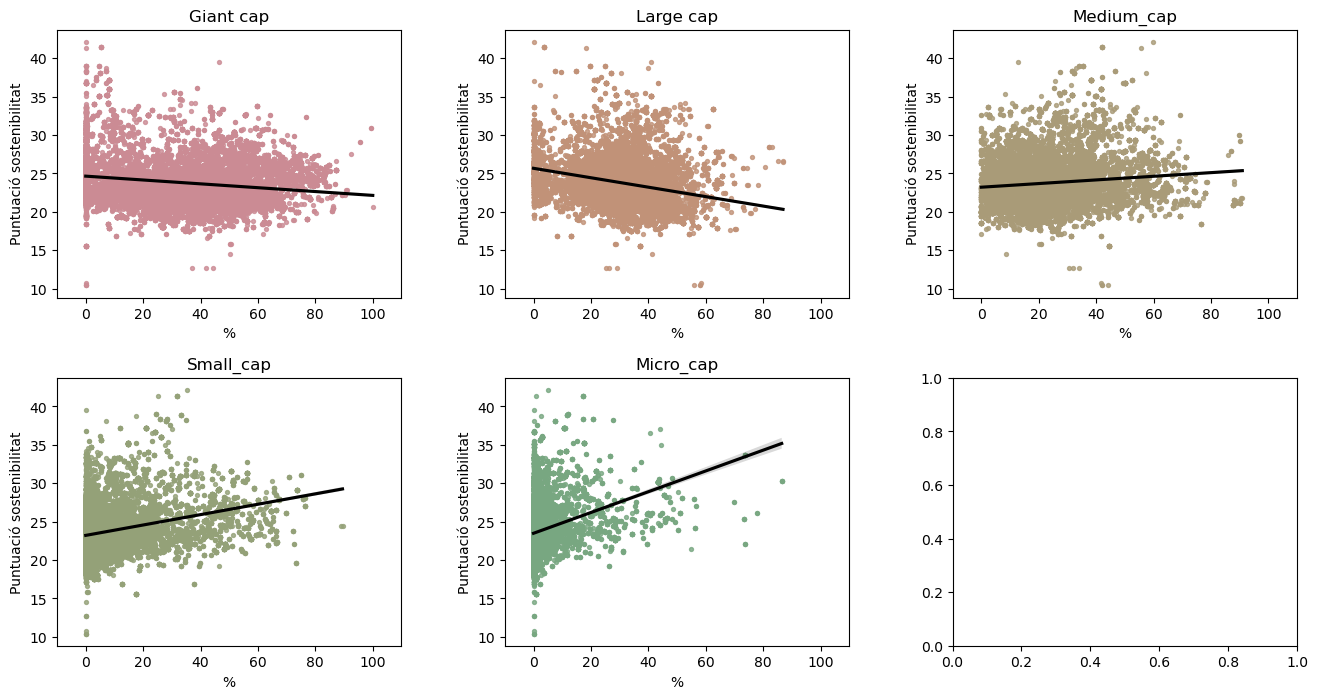

In [28]:
colors = sns.husl_palette(n_colors=11, s=.4)

# Filtratge ded ades
morningstar_f = morningstar_variable.query('market_cap_giant >= 0 and market_cap_giant <= 100')
morningstar_f = morningstar_f.query('market_cap_large >= 0 and market_cap_large <= 100')
morningstar_f = morningstar_f.query('market_cap_medium >= 0 and market_cap_medium <= 100')
morningstar_f = morningstar_f.query('market_cap_small >= 0 and market_cap_small <= 100')
morningstar_f = morningstar_f.query('market_cap_micro >= 0 and market_cap_micro <= 100')

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

for i in range(2):
    for j in range(3):
        index = i * 3 + j
        if index < 5:
            sns.regplot(data=morningstar_f, x=market_cap[index], y='sustainability_score', truncate=True, ax=ax[i][j], color=colors[index], line_kws={'color':'black'}, scatter_kws={'alpha': 0.8, 's': 8})
            ax[i][j].set_xlim(-10, 110)
            ax[i][j].set(xlabel='%', ylabel='Puntuació sostenibilitat', title=market_cap[index])
            ax[i][j].set_title(title_list[index])


plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

Similarment, sembla que els fons que es centren en empreses amb més capitalització, les inversions son més sostenibles.

##### Renda Fixa vs Rendibilitat

En el cas de la renda fixa, que pot ser o bé d'estats o corporativa (per exemple, bons d'empreses) podem classificar segons risc creditici. La més alta és aaa i indica que el país o l'empresa tindrà una alta capacitat per retornar el crèdit i va baixant d'aaa fins a ccc, tot i que en el nostre dataset, s'indica aquest com a below_b..
Les agruparem en alta puntuació creditícia (aaa, aa, a), mitja (bbb, bb i b) i baixa (below_b)

In [29]:
credit = ['credit_aaa', 'credit_aa', 'credit_a', 'credit_bbb', 'credit_bb', 'credit_b', 'credit_below_b', 'credit_not_rated']
nan_percentages = morningstar_egs.groupby('supracategory')[credit].apply(lambda x: (x.isna().all(axis=1).sum() / len(x)) * 100)
print(nan_percentages)

morningstar_bonds = morningstar_egs.dropna(subset=credit, how='all')

nan_percentages = morningstar_bonds.groupby('supracategory')[credit].apply(lambda x: (x.isna().all(axis=1).sum() / len(x)) * 100)
nan_percentages

supracategory
Alternatius       72.324281
Altres            86.792453
Commodities       97.167756
Immobles          97.724687
Mixtes            55.422169
Monetaris         96.853491
Renta Fixa        38.510396
Renta Variable    98.951909
dtype: float64


supracategory
Alternatius       0.0
Altres            0.0
Commodities       0.0
Immobles          0.0
Mixtes            0.0
Monetaris         0.0
Renta Fixa        0.0
Renta Variable    0.0
dtype: float64

In [30]:
# Noves columnes
morningstar_bonds['credit_high'] = morningstar_bonds['credit_aaa'] + morningstar_bonds['credit_aa'] + morningstar_bonds['credit_a']
morningstar_bonds['credit_medium'] =  + morningstar_bonds['credit_bbb'] + morningstar_bonds['credit_bb'] + morningstar_bonds['credit_b']
morningstar_bonds['credit_low'] =  + morningstar_bonds['credit_below_b']

# Eliminem columnes originals
morningstar_bonds.drop(columns=['credit_aaa', 'credit_aa', 'credit_a', 'credit_bbb', 'credit_bb', 'credit_b'], inplace=True)

morningstar['credit_high'] = morningstar['credit_aaa'] + morningstar['credit_aa'] + morningstar['credit_a']
morningstar['credit_medium'] = morningstar['credit_bbb'] + morningstar['credit_bb'] + morningstar['credit_bb']
morningstar['credit_low'] = morningstar['credit_below_b']

morningstar.drop(columns=['credit_aaa', 'credit_aa', 'credit_a', 'credit_bbb', 'credit_bb', 'credit_b'], inplace=True)

C:\Users\Carles\AppData\Local\Temp\ipykernel_10580\994263145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morningstar_bonds['credit_high'] = morningstar_bonds['credit_aaa'] + morningstar_bonds['credit_aa'] + morningstar_bonds['credit_a']
C:\Users\Carles\AppData\Local\Temp\ipykernel_10580\994263145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morningstar_bonds['credit_medium'] =  + morningstar_bonds['credit_bbb'] + morningstar_bonds['credit_bb'] + morningstar_bonds['credit_b']
C:\Users\Carles\A

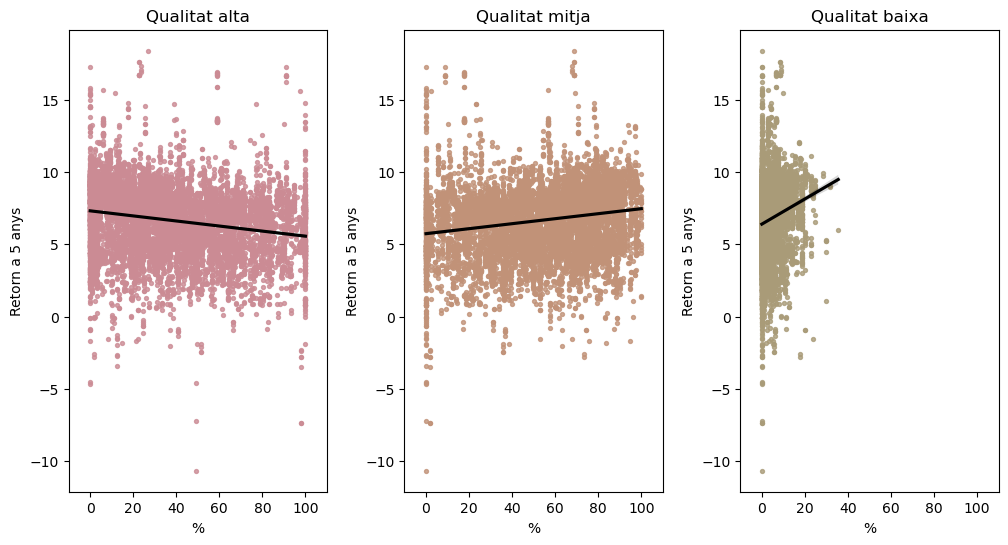

In [31]:
credit = ['credit_high', 'credit_medium', 'credit_low']
title_list = ['Qualitat alta', 'Qualitat mitja', 'Qualitat baixa']

# Paleta
colors = sns.husl_palette(n_colors=11, s=.4)
sns.set_palette(colors)

# Filtratge
morningstar_f = morningstar_bonds.query('credit_high >= 0 and credit_high <= 100')
morningstar_f = morningstar_f.query('credit_medium >= 0 and credit_medium <= 100')
morningstar_f = morningstar_f.query('credit_low >= 0 and credit_low <= 99')

# Boxplot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
ax = ax.flatten()

for i in range(3):
    x_col = credit[i]
    sns.regplot(data=morningstar_f, x=x_col, y='fund_trailing_return_5years', truncate=True, ax=ax[i], color=colors[i], line_kws={'color':'black'}, scatter_kws={'alpha': 0.8, 's': 8})
    ax[i].set_xlim(-10, 110)
    ax[i].set(xlabel='%', ylabel='Retorn a 5 anys', title=x_col)
    ax[i].set_title(title_list[i])

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

La major rendibilitat s'obté en els deutes de pitjor qualitat a canvi d'un major risc (que no podem estudiar amb aquest dataset).

In [32]:
##### Renda fixa vs Sostenibilitat

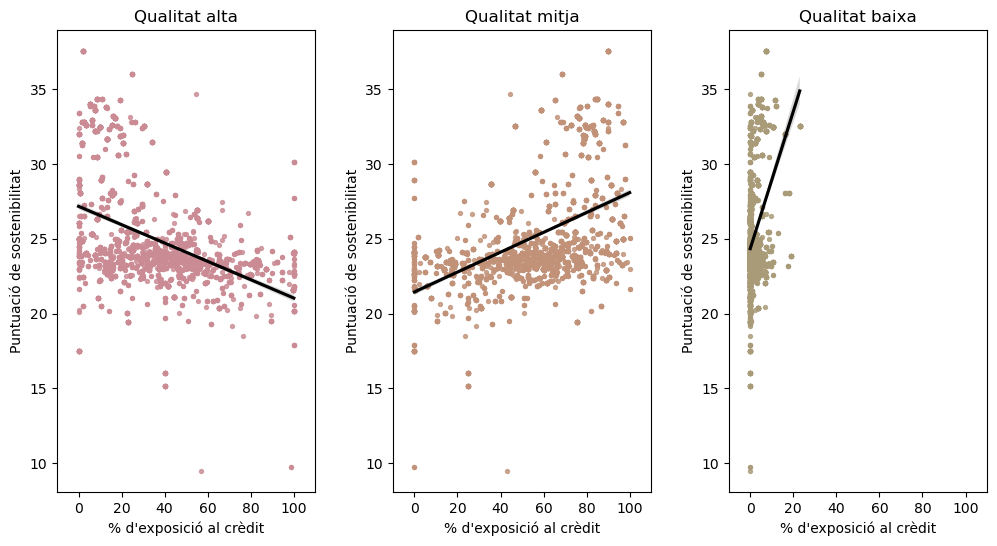

In [33]:
credit = ['credit_high', 'credit_medium', 'credit_low']

# Paleta
colors = sns.husl_palette(n_colors=11, s=.4)
sns.set_palette(colors)

# Filtratge
morningstar_f = morningstar_bonds.query('credit_high >= 0 and credit_high <= 100')
morningstar_f = morningstar_f.query('credit_medium >= 0 and credit_medium <= 100')
morningstar_f = morningstar_f.query('credit_low >= 0 and credit_low <= 99') #Outlier

# Box-plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
ax = ax.flatten()
for i in range(3):
    x_col = credit[i]
    sns.regplot(data=morningstar_f, x=x_col, y='sustainability_score', truncate=True, ax=ax[i], color=colors[i], line_kws={'color':'black'}, scatter_kws={'alpha': 0.8, 's': 8})
    ax[i].set_xlim(-10, 110)
    ax[i].set(xlabel='% d\'exposició al crèdit', ylabel='Puntuació de sostenibilitat', title=x_col)
    ax[i].set_title(title_list[i])
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

A major exposició a crèdit de pitjor qualitat, la puntuació en sostenibilitat es redueix.

#### f. Rendibilitat vs Cost de Gestió

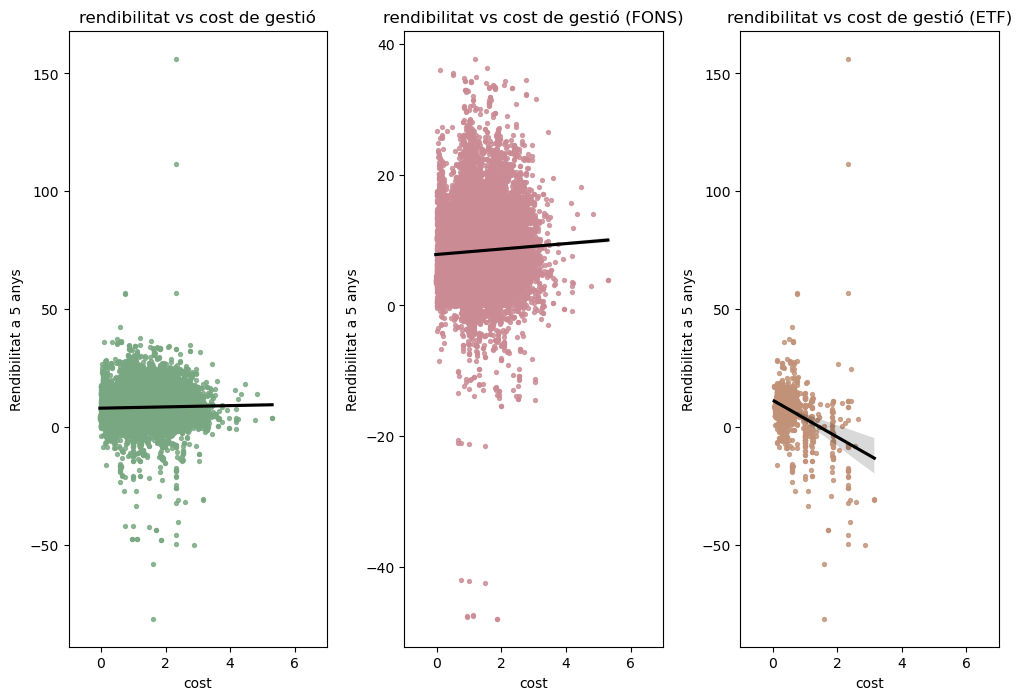

In [34]:
colors = sns.husl_palette(n_colors=11, s=.4)
sns.set_palette(colors)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

sns.regplot(data=morningstar_egs, x='ongoing_cost', y='fund_trailing_return_5years', truncate=True, color=colors[4], line_kws={'color':'black'}, scatter_kws={'alpha': 0.8, 's': 8}, ax=axes[0])
axes[0].set_xlim(-1, 7)
axes[0].set(xlabel='cost', ylabel='Rendibilitat a 5 anys', title='rendibilitat vs cost de gestió')

search = morningstar_egs['type'] == 'funds'
subset = morningstar_egs[search]
sns.regplot(data=subset, x='ongoing_cost', y='fund_trailing_return_5years', truncate=True, color=colors[0], line_kws={'color':'black'}, scatter_kws={'alpha': 0.8, 's': 8}, ax=axes[1])
axes[1].set_xlim(-1, 7)
axes[1].set(xlabel='cost', ylabel='Rendibilitat a 5 anys', title='rendibilitat vs cost de gestió (FONS)')

search = morningstar_egs['type'] == 'etf'
subset = morningstar_egs[search]
sns.regplot(data=subset, x='ongoing_cost', y='fund_trailing_return_5years', truncate=True, color=colors[1], line_kws={'color':'black'}, scatter_kws={'alpha': 0.8, 's': 8}, ax=axes[2])
axes[2].set_xlim(-1, 7)
axes[2].set(xlabel='cost', ylabel='Rendibilitat a 5 anys', title='rendibilitat vs cost de gestió (ETF)')

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

En conjunt, sembla que no hi ha correlació entre el rendiment i el cost de gestió. Però per separat observem com sí que hi ha i amb comportaments diferents. A més comissions sembla que la rendibilitat pugui ser major en els fons, però en els etfs i aquí sí que de forma clara, les comissions altes afecten molt negativament el rendiment.

##### Rating Morningstar vs Cost de gestió

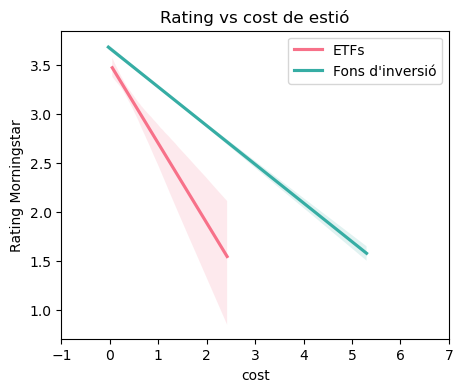

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtratge
search_etf = morningstar_egs['type'] == 'etf'
sub_etf = morningstar_egs[search_etf]

search_funds = morningstar_egs['type'] == 'funds'
sub_funds = morningstar_egs[search_funds]

colors = sns.husl_palette(n_colors=8)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))

sns.regplot(data=sub_etf, x='ongoing_cost', y='rating', truncate=True, color=colors[0], scatter=False, ax=ax, label='ETFs')
sns.regplot(data=sub_funds, x='ongoing_cost', y='rating', truncate=True, color=colors[4], scatter=False, ax=ax, label='Fons d\'inversió')

ax.set_xlim(-1, 7)
ax.set(xlabel='cost', ylabel='Rating Morningstar', title='Rating vs cost de estió')

ax.legend()

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

Una altra manera de veure com es comporta un fons o etf és fer-ho amb el rating de Morningstar, que analitza el rendiment ajustat al risc d'un producte amb relació a la resta de la seva categoria. Es puntua d'1 a 5 estreles. Aquí observem clarament com les comissions afecten negativament aquest rating.
Cal comentar que un fons en concret sol tindre diverses versions, amb diferents costos de gestions, dirigits a inversors diferents (grans inversors amb menys comissions i petits inversors amb més comissions) on el rating es troba molt negativament correlacionat.

#### g. Exposició geográfica

Un dels camps de dataset és l'exposició geogràfica. Mostra, per a cada país, el percentatge de la inversió respecte la total del fons o etf. Estudiarem l'exposició de dos formes, per continents i diferenciant el mercat de països desenvolupats i emergents, ja que sol ser una manera típica de diferenciar-se els fons. Per a poder fer-ho, ens caldrà extraure aquesta informació del camp.

In [36]:
morningstar['country_exposure']

0                                               CHE: 100.0
1               SWE: 91.54, GBR: 3.05, CHE: 2.8, FIN: 2.62
2        GBR: 32.85, FRA: 32.11, DEU: 11.32, NLD: 9.56,...
3                                               DEU: 100.0
4        FRA: 24.57, USA: 21.22, DEU: 16.27, GBR: 7.42,...
                               ...                        
67093    CYM: 54.09, DEU: 11.83, FRA: 10.2, NLD: 8.03, ...
67094    JPN: 21.08, GBR: 16.71, DEU: 16.33, USA: 15.58...
67095    FRA: 27.49, DEU: 18.05, NLD: 14.22, GBR: 13.28...
67096    KOR: 18.2, IDN: 15.46, CHN: 12.84, BRA: 9.53, ...
67097    KOR: 18.2, IDN: 15.46, CHN: 12.84, BRA: 9.53, ...
Name: country_exposure, Length: 57521, dtype: object

 ##### Exposició per país

In [37]:
# Obrim l'arxiu de l'exposició per països
file_name = 'country_exposure_df.csv'
file = output_path / file_name
country_exposure_df = pd.read_csv(file, sep=',', header='infer', encoding="utf-8")

##### Agrupació per continents

In [38]:
europe = ["CHE", "SWE", "GBR", "FIN", "FRA", "DEU", "NLD", "DNK", "ITA", "POL", "BEL", "NOR", "LUX", "AUT", "PRT", "IRL", "RUS", "ESP", "CZE", "SVK", "SVN", "LTU", "LVA", "EST", "IMN", "AND", "GGY", "JEY", "FRO", "SXM", "ALB", "MCO", "LIE", "BMU", "ISL", "CYP", "BLR", "IMN", "MKD", "GGY", "JEY"]

north_america = ["USA", "CAN", "PRI", "DOM", "MEX"]

south_america = ["BRA", "ARG", "CHL", "PER", "COL", "CRI", "SLV", "JAM", "PRY", "TTO", "URY", "VEN", "BLZ", "BRB", "GRD", "ABW"]

asia = ["HKG", "MAC", "SGP", "CHN", "ISR", "ARE", "VNM", "KWT", "IDN", "THA", "KOR", "TWN", "PHL", "AZE", "LBN", "ARM", "KGZ", "UZB", "GEO", "TJK", "SYC", "MMR", "NPL", "AND", "LAO", "MDV", "BDI"]

africa = ["EGY", "ZAF", "NGA", "KEN", "ETH", "TUN", "MAR", "SEN", "CIV", "UGA", "CMR", "TZA", "RWA", "GIN", "MOZ", "COD", "MWI", "GMB", "NAM", "BWA", "MDG", "LSO", "AGO", "MWI", "GNQ", "LBR", "CIV", "STP", "SYC", "DJI", "COM", "BEN", "ZWE"]

oceania = ["AUS", "NZL", "PNG", "FJI", "SLB", "VUT", "KIR", "FSM", "MHL", "NRU", "PLW", "TON", "WSM", "TUV"]

In [39]:
# Diccionari de continents
continents = {'exposure_europe': europe, 'exposure_north_america': north_america, 'exposure_south_america': south_america, 'exposure_asia': asia, 'exposure_africa': africa, 'exposure_oceania': oceania}

# Transposició
country_exposure_t = country_exposure_df.set_index('isin').T.reset_index()

# Melt a dades long
country_exposure_melt = pd.melt(country_exposure_t, id_vars='index', value_vars=country_exposure_t.columns[1:], var_name='isin', value_name='Percentatge')

# Es filren les files amb percentatge diferent de zero
country_exposure_melt = country_exposure_melt[country_exposure_melt['Percentatge'] != 0]
continents_inv = {v: k for k, values in continents.items() for v in values}

# Es renonmbren les sigles dels països amb els noms dels continents
country_exposure_melt['index'] = country_exposure_melt['index'].map(continents_inv)

# Agrupem el DataFrame per 'Fons' i 'Continent', i calcula la suma dels percentatges per grup
continent_exposure = country_exposure_melt.groupby(['index', 'isin']).sum(numeric_only=True).reset_index()

# Crear arxiu csv
output_file = 'country_exposure.csv'
continent_exposure.rename(columns={'index': 'continent'}, inplace=True)
continent_exposure.to_csv(output_path / output_file, index=False)

##### Agrupació per mercat

La separació entre mercats es pot fer seguint diferents classificacions fetes per diferents organitzacions o empreses com pot ser la del MSCI. Aquesta empresa pública tota una sèrie d'índexs, ferramentes i anàlisis per orientar les inversions. Molts dels índexs que publiquen són la base per crear, després, ETFs i fons d'inversió de gestió passiva. I de fet, sol ser comú l'expressió, indexar-se al mon com indexar-se seguint el seu llistat d'empreses que representen el món com el MSCI World (tot i tindre un biaix fort cap a nord-Amèrica i altres països dels mercats desenvolupats, per això se sol complementar amb fons o etfs que se centren en els mercats emergents. La llista que utilitzarem inclou els següents països segons el mercat.

Mercat desenvolupat:

- Canadà
- Àustria
- Itàlia
- Austràlia
- Estats Units
- Bèlgica
- Països Baixos
- Hong Kong
- Dinamarca
- Noruega
- Japó
- Finlàndia
- Portugal
- Nova Zelanda
- França
- Espanya
- Singapur
- Alemanya
- Suècia
- Irlanda
- Suïssa
- Regne Unit
- Israel

Mercat emergent:

- Brasil
- Xile
- Xina
- Colòmbia
- República Txeca
- Egipte
- Grècia
- Hongria
- Índia
- Indonèsia
- Corea del Sud
- Kuwait
- Malàisia 
- Mèxic
- Perú
- Filipines
- Polònia
- Qatar
- Rússia
- Aràbia Saudita
- Sud-àfrica
- Taiwan
- Tailàndia
- Turquia
- Emirats Àrabs Units
- Brasil

In [40]:
emerging = ["BRA", "CHL", "CHN", "COL", "CZE", "EGY", "GRC", "HUN", "IND", "IDN", "KOR", "KWT", "MYS", "MEX", "PER", "PHL", "POL", "QAT", "RUS", "SAU", "ZAF", "TWN", "THA", "TUR", "ARE"]
developed = ["CAN", "AUT", "ITA", "AUS", "USA", "BEL", "NLD", "HKG", "DNK", "NOR", "JPN", "FIN", "PRT", "NZL", "FRA", "ESP", "SGP", "DEU", "SWE", "IRL", "CHE", "GBR", "ISR"]
others = ["ARG", "BHR", "BGD", "BTN", "CIV", "CMR", "COL", "CRI", "HRV", "CUB", "CYP", "DJI", "DMA", "DOM", "ECU", "SLV", "GNQ", "ETH", "FJI", "GMB", "GHA", "GRD", "GTM", "GIN", "HTI", "HND", "IRN", "IRQ", "JAM", "JOR", "KEN", "LBN", "LSO", "LBR", "LBY", "MKD", "MWI", "MDV", "MLI", "MTQ", "MRT", "MUS", "MDG", "MLT", "MRT", "MUS", "MYT", "NIC", "NER", "NGA", "PRK", "OMN", "PAK", "PAN", "PNG", "PRY", "PER", "PHL", "PRI", "QAT", "REU", "RWA", "KNA", "LCA", "VCT", "WSM", "STP", "SAU", "SEN", "SLE", "SGP", "SOM", "LKA", "SDN", "SUR", "SWZ", "SYR", "TJK", "TZA", "TLS", "TGO", "TTO", "TUN", "UGA", "UKR", "URY", "UZB", "VUT", "VEN", "VNM", "ESH", "YEM", "ZMB", "ZWE"]

In [41]:
# Diccionari continents
continents = {'exposure_developed': developed, 'exposure_emerging': emerging, 'exposure_others': others}

# Transposar
country_exposure_t = country_exposure_df.set_index('isin').T.reset_index()

# Melt a dades long
country_exposure_melt = pd.melt(country_exposure_t, id_vars='index', value_vars=country_exposure_t.columns[1:], var_name='isin', value_name='Percentatge')

# Es filren les files amb percentatge diferent de zero
country_exposure_melt = country_exposure_melt[country_exposure_melt['Percentatge'] != 0]

continents_inv = {v: k for k, values in continents.items() for v in values}

# Es renonmbren les sigles dels països amb els noms dels continents
country_exposure_melt['index'] = country_exposure_melt['index'].map(continents_inv)

# Agrupem el DataFrame per 'Fons' i 'Continent', i calcula la suma dels percentatges per grup
market_exposure = country_exposure_melt.groupby(['index', 'isin']).sum(numeric_only=True).reset_index()
market_exposure.rename(columns={'index': 'market'}, inplace=True)

# Crear arxiu csv
output_file = 'market_exposure.csv'
market_exposure.to_csv(output_path / output_file, index=False)

In [42]:
market_exposure_pivot = market_exposure.pivot(index='isin', columns='market', values='Percentatge')
continent_exposure_pivot = continent_exposure.pivot(index='isin', columns='continent', values='Percentatge')
morningstar = pd.merge(morningstar, market_exposure_pivot, on='isin', how='inner')
morningstar = pd.merge(morningstar, continent_exposure_pivot, on='isin', how='inner')

De nou, trobem algunes incoherències, ja que al sumar l'exposició per continents, alguns fons o etfs sumen més del 100%. Els eliminarem.

In [43]:
# Calcular la suma de la columna country_exposure
morningstar['continent_exposure_sum'] = morningstar['exposure_europe'] + morningstar['exposure_north_america'] + morningstar['exposure_south_america'] + morningstar['exposure_asia'] + morningstar['exposure_africa'] + morningstar['exposure_oceania']

# Identifiquem els fons que excedeixen en 100 % l'exposició segons continent en total
excess_sum_continent = morningstar['continent_exposure_sum'] > 100

# Calculem el nombre de columnes a eliminar
rows_to_drop = morningstar[excess_sum_continent]
num_rows_dropped = len(rows_to_drop)

# Eliminar columnes que la suma excedisca el 100% en la exposició de continent
morningstar_exposure = morningstar[~excess_sum_continent]

# Ara ho fem per a l'exposició per mercats
morningstar_exposure['market_exposure_sum'] = morningstar_exposure['exposure_developed'] + morningstar_exposure['exposure_emerging'] + morningstar_exposure['exposure_others']

# Identifiquem els fons que excedeixen en 100 % l'exposició segons mercat en total
excess_sum_market = morningstar_exposure['market_exposure_sum'] > 100

# Calculem el nombre de columnes a eliminar
rows_to_drop = morningstar_exposure[excess_sum_market]
num_rows_dropped = len(rows_to_drop)

# Eliminar columnes que la suma excedisca el 100% en la exposició de mercat
morningstar_exposure = morningstar_exposure[~excess_sum_market]

# Eliminem columna auxiliar
morningstar_exposure = morningstar_exposure.drop('continent_exposure_sum', axis=1)
morningstar_exposure = morningstar_exposure.drop('market_exposure_sum', axis=1)

print(f"S'han eliminat {num_rows_dropped} files amb una suma de més de 100% en la columna country_exposure.")

S'han eliminat 6514 files amb una suma de més de 100% en la columna country_exposure.


C:\Users\Carles\AppData\Local\Temp\ipykernel_10580\3599625964.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morningstar_exposure['market_exposure_sum'] = morningstar_exposure['exposure_developed'] + morningstar_exposure['exposure_emerging'] + morningstar_exposure['exposure_others']


##### Exposició per continents i mercat

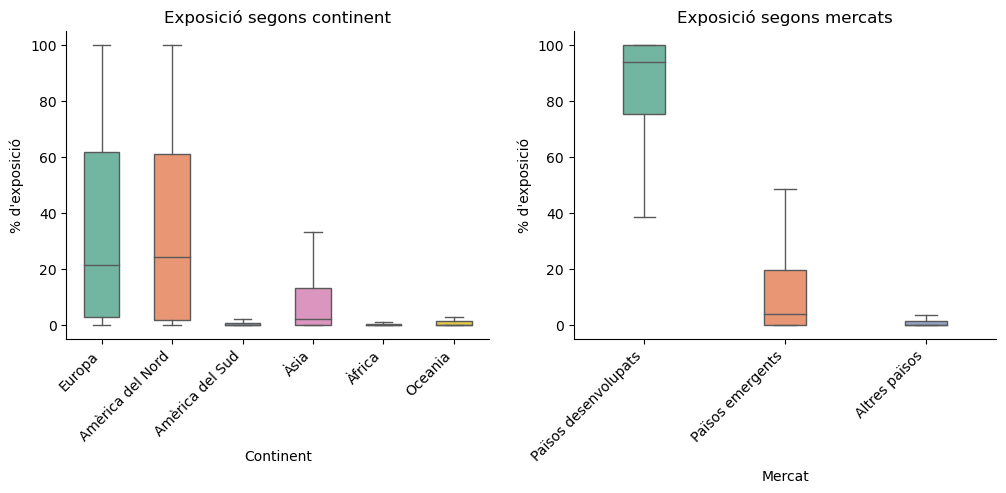

In [44]:
# Definir una nova paleta de colors
colors = sns.color_palette('Set2', n_colors=len(supracategory_order))

# Crear un subplot amb 1 fila i 2 columnes
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Primer gràfic: Exposició segons continent
var_list = ['exposure_europe', 'exposure_north_america', 'exposure_south_america', 'exposure_asia', 'exposure_africa', 'exposure_oceania']
sns.boxplot(ax=ax[0], data=morningstar_exposure[var_list], showfliers=False, palette=colors, width=0.5, linewidth=1)
alpha=0.7
for i, artist in enumerate(axs[0].artists):
    color = artist.get_facecolor()
    artist.set_facecolor((color[0], color[1], color[2], alpha))
for i, patch in enumerate(axs[0].patches):
    color = patch.get_facecolor()
    patch.set_facecolor((color[0], color[1], color[2], alpha))
sns.despine(ax=ax[0])
ax[0].set_xlabel('Continent')
ax[0].set_ylabel('% d\'exposició')
ax[0].set_title('Exposició segons continent')
etiquetes_x = ['Europa', 'Amèrica del Nord', 'Amèrica del Sud', 'Àsia', 'Àfrica', 'Oceania']
ax[0].set_xticklabels(etiquetes_x, rotation=45, ha='right')
ax[0].grid(False)

# Segon gràfic: Exposició segons mercats
var_list = ['exposure_developed', 'exposure_emerging', 'exposure_others']
sns.boxplot(ax=ax[1], data=morningstar_exposure[var_list], showfliers=False, palette=colors, width=0.3, linewidth=1)
for i, artist in enumerate(axs[1].artists):
    color = artist.get_facecolor()
    artist.set_facecolor((color[0], color[1], color[2], alpha))
for i, patch in enumerate(axs[1].patches):
    color = patch.get_facecolor()
    patch.set_facecolor((color[0], color[1], color[2], alpha))
sns.despine(ax=ax[1])
ax[1].set_xlabel('Mercat')
ax[1].set_ylabel('% d\'exposició')
ax[1].set_title('Exposició segons mercats')
etiquetes_x = ['Europa', 'Amèrica del Nord', 'Amèrica del Sud', 'Àsia', 'Àfrica', 'Oceania']
etiquetes_x = ['Països desenvolupats', 'Països emergents', 'Altres països']
ax[1].set_xticklabels(etiquetes_x, rotation=45, ha='right')
ax[1].grid(False)

# Mostrar el gràfic
plt.show()


La major part dels fons es centren tant en Europa com en Amèrica del Nord (Principalment USA). Tot i que també hi ha una quantitat important de fons que s'exposen en Àsia. Respecte l'exposició segons els mercats, la major part de fons estan exposats en aquest mercat.

##### Exposició per continents vs Sostenibilitat

In [45]:
var_list = ['environmental_score', 'social_score', 'governance_score']

excess_score = morningstar_exposure[var_list[0]] > 25
rows_to_drop = morningstar_exposure[excess_score]
print(len(rows_to_drop))
morningstar_exposure_egs = morningstar_exposure[~excess_score]

excess_score = morningstar_exposure_egs[var_list[1]] > 25
rows_to_drop = morningstar_exposure_egs[excess_score]
print(len(rows_to_drop))
morningstar_exposure_egs = morningstar_exposure_egs[~excess_score]

excess_score = morningstar_exposure_egs[var_list[2]] > 25
rows_to_drop = morningstar_exposure_egs[excess_score]
print(len(rows_to_drop))
morningstar_exposure_egs = morningstar_exposure_egs[~excess_score]

117
0
0


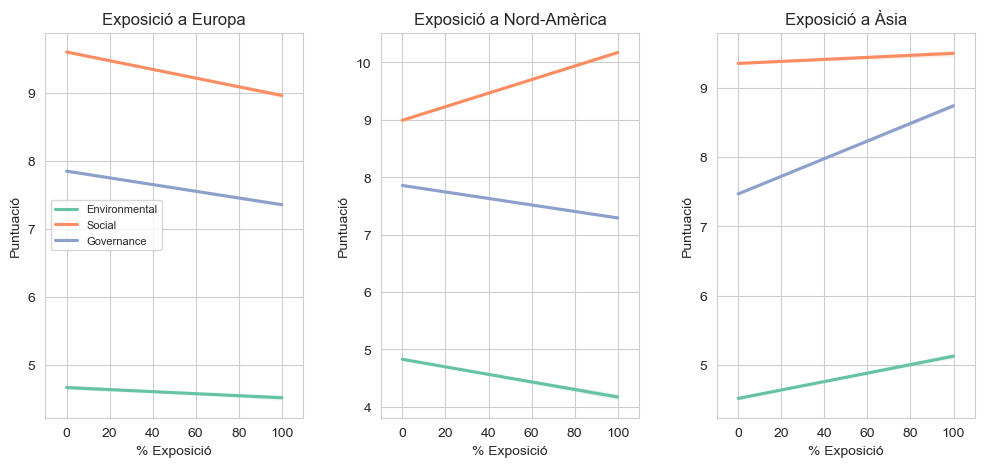

In [46]:
sns.set_style("whitegrid")
colors = sns.color_palette('Set2', n_colors=len(supracategory_order))

var_list = ['exposure_europe', 'exposure_north_america', 'exposure_asia']
title_list = [
    'Exposició a Europa',
    'Exposició a Nord-Amèrica',
    'Exposició a Àsia',
]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

for i in range(1):
    for j in range(3):
        index = i * 3 + j
        sns.regplot(data=morningstar_exposure_egs, x=var_list[index], y='environmental_score', truncate=True, ax=ax.flat[index], scatter=False, line_kws={'color':colors[0]}, label='Environmental')
        sns.regplot(data=morningstar_exposure_egs, x=var_list[index], y='social_score', truncate=True, ax=ax.flat[index], scatter=False, line_kws={'color':colors[1]}, label='Social')
        sns.regplot(data=morningstar_exposure_egs, x=var_list[index], y='governance_score', truncate=True, ax=ax.flat[index], scatter=False, line_kws={'color':colors[2]}, label='Governance')
        ax.flat[index].set_xlim(-10, 110)
        ax.flat[index].set(xlabel='% Exposició', ylabel='Puntuació', title=title_list[index])
        ax.flat[index].title.set_fontsize(12)
        if index == 0:
            ax.flat[index].legend(fontsize=8)
        ax[index].grid(True)


# Ajustar espaiat entre subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

En Europa, la puntuació és menor (ho sigui, millor sensibilitat de les inversions a la sostenibilitat) a mesura que s'incrementa l'exposició. Curiosament, a Nord-Amèrica, passa el mateix excepte en l'àmbit social on sembla que el caràcter més liberal té un efecte important en aquest aspecte. En Àsia, en canvi, totes les puntuacions s'incrementen amb una major exposició.

##### Exposició segons els mercat

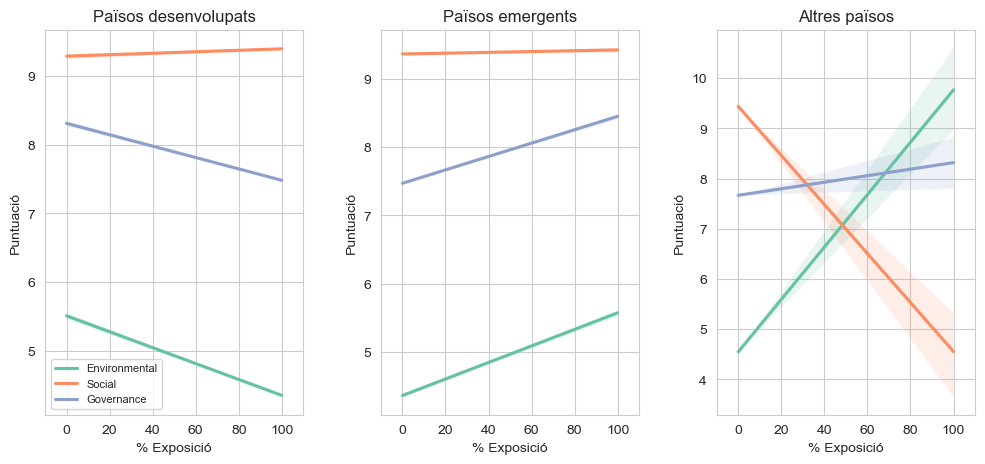

In [47]:
sns.set_style("whitegrid")
colors = sns.color_palette('Set2', n_colors=len(supracategory_order))

var_list = ['exposure_developed', 'exposure_emerging', 'exposure_others']
title_list = [
    'Països desenvolupats',
    'Països emergents',
    'Altres països',
]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

for i in range(1):
    for j in range(3):
        index = i * 3 + j
        sns.regplot(data=morningstar_exposure_egs, x=var_list[index], y='environmental_score', truncate=True, ax=ax.flat[index], scatter=False, line_kws={'color':colors[0]}, label='Environmental')
        sns.regplot(data=morningstar_exposure_egs, x=var_list[index], y='social_score', truncate=True, ax=ax.flat[index], scatter=False, line_kws={'color':colors[1]}, label='Social')
        sns.regplot(data=morningstar_exposure_egs, x=var_list[index], y='governance_score', truncate=True, ax=ax.flat[index], scatter=False, line_kws={'color':colors[2]}, label='Governance')
        ax.flat[index].set_xlim(-10, 110)
        ax.flat[index].set(xlabel='% Exposició', ylabel='Puntuació', title=title_list[index])
        ax.flat[index].title.set_fontsize(12)
        if index == 0:
            ax.flat[index].legend(fontsize=8)
        ax[index].grid(True)


# Ajustar espaiat entre subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

El que hem vist anteriorment es tradueix en la sostenibilitat segons el mercat.

##### Mercat vs Sostenibilitat

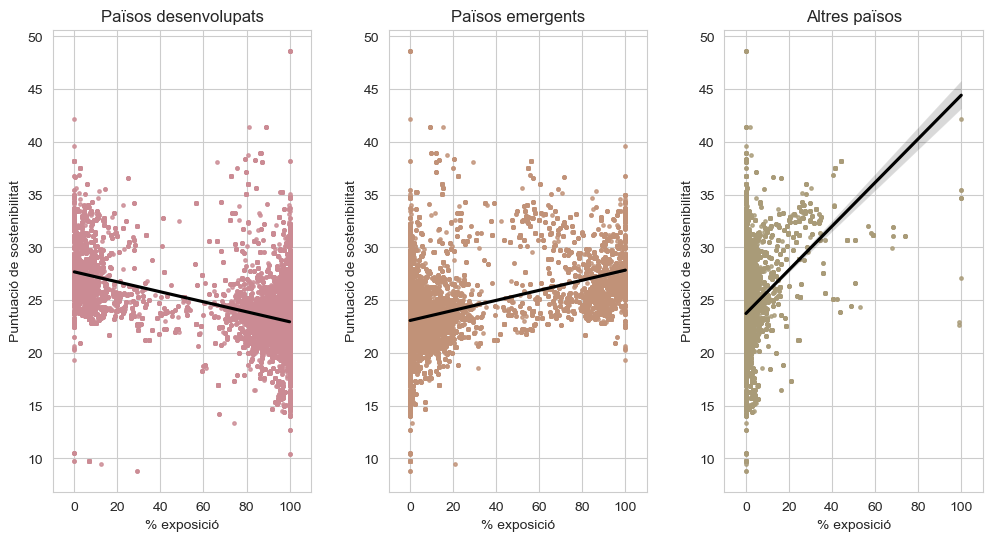

In [48]:
var_list = ['exposure_developed', 'exposure_emerging', 'exposure_others',]
title_list = [
    'Països desenvolupats',
    'Països emergents',
    'Altres països',
]

# Paleta colors
colors = sns.husl_palette(n_colors=11, s=.4)  # Utilitzar la paleta de colors HUSL de Seaborn amb saturació s = 0.4
sns.set_palette(colors)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i in range(1):
    for j in range(3):
        index = i * 3 + j
        if index < 11:
            #x_col = morningstar_f.columns[index + 1]
            #x_col_float = morningstar_f[x_col].astype(float) # Convertir a tipus float
            sns.regplot(data=morningstar_exposure_egs, x=var_list[index], y='sustainability_score', truncate=True, ax=ax.flat[index], color=colors[index], line_kws={'color':'black'}, scatter_kws={'alpha': 0.8, 's': 6})
            ax.flat[index].set_xlim(-10, 110)
            ax.flat[index].set(xlabel='% exposició', ylabel='Puntuació de sostenibilitat', title=title_list[index])

# Ajustar espaciat entre subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

Els fons i etfs més sostenibles són aquells que més exposats estan als paísos desenvolupats.

#### h. Resum correlacions per a cost, rendibilitat i sostenibilitat

In [49]:
# Preparció

search = morningstar_exposure_egs['type'] == 'etf'

subset = morningstar_exposure_egs[search]

col_sel = [
    'isin', 'fund_name', 'rating', 'ongoing_cost',
    'sector_basic_materials', 'sector_consumer_cyclical', 'sector_financial_services', 'sector_real_estate',
    'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities', 'sector_communication_services',
    'sector_energy', 'sector_industrials', 'sector_technology',
    'market_cap_giant', 'market_cap_large', 'market_cap_medium', 'market_cap_small', 'market_cap_micro',
    'credit_high', 'credit_medium', 'credit_low', 'credit_not_rated',
    'exposure_developed', 'exposure_emerging', 'exposure_others', 'exposure_africa', 'exposure_asia', 
    'exposure_europe', 'exposure_north_america', 'exposure_oceania', 'exposure_south_america',
    'environmental_score', 'social_score', 'governance_score', 'sustainability_score',
    'fund_trailing_return_10years']

morningstar_sel = subset[col_sel]

morningstar_matrix_etf = morningstar_sel.corr()

search = morningstar_exposure_egs['type'] == 'funds'

subset = morningstar_exposure_egs[search]

col_sel = [
    'isin', 'fund_name', 'rating', 'ongoing_cost',
    'sector_basic_materials', 'sector_consumer_cyclical', 'sector_financial_services', 'sector_real_estate',
    'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities', 'sector_communication_services',
    'sector_energy', 'sector_industrials', 'sector_technology',
    'market_cap_giant', 'market_cap_large', 'market_cap_medium', 'market_cap_small', 'market_cap_micro',
    'credit_high', 'credit_medium', 'credit_low', 'credit_not_rated',
    'exposure_developed', 'exposure_emerging', 'exposure_others', 'exposure_africa', 'exposure_asia', 
    'exposure_europe', 'exposure_north_america', 'exposure_oceania', 'exposure_south_america',
    'environmental_score', 'social_score', 'governance_score', 'sustainability_score',
    'fund_trailing_return_10years']

morningstar_sel = subset[col_sel]

morningstar_matrix_funds = morningstar_sel.corr()

matrix_etf_sel = morningstar_matrix_etf[['ongoing_cost', 'sustainability_score', 'fund_trailing_return_10years']]
rename = {'ongoing_cost': 'ongoing_cost_etf', 'sustainability_score':'sustainability_score_etf', 'fund_trailing_return_10years': 'return_10years_etf'}
matrix_etf_sel = matrix_etf_sel.rename(columns=rename)

matrix_funds_sel = morningstar_matrix_funds[['ongoing_cost', 'sustainability_score', 'fund_trailing_return_10years']]
rename = {'ongoing_cost': 'ongoing_cost_funds', 'sustainability_score':'sustainability_score_funds','fund_trailing_return_10years': 'return_10years_funds'}
matrix_funds_sel = matrix_funds_sel.rename(columns=rename)

<AxesSubplot: >

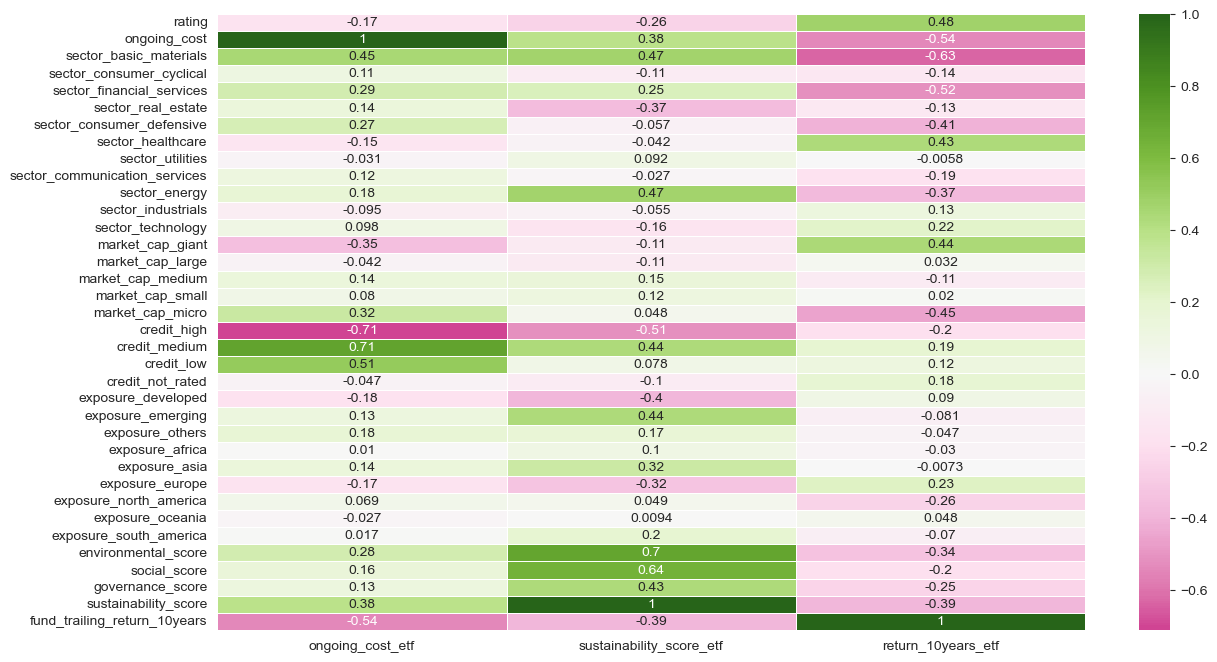

In [50]:
fig, ax = plt.subplots(figsize=(14,8))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

sns.heatmap(matrix_etf_sel, annot=True, linewidth=.5, ax=ax, cmap="PiYG", center=0)

<AxesSubplot: >

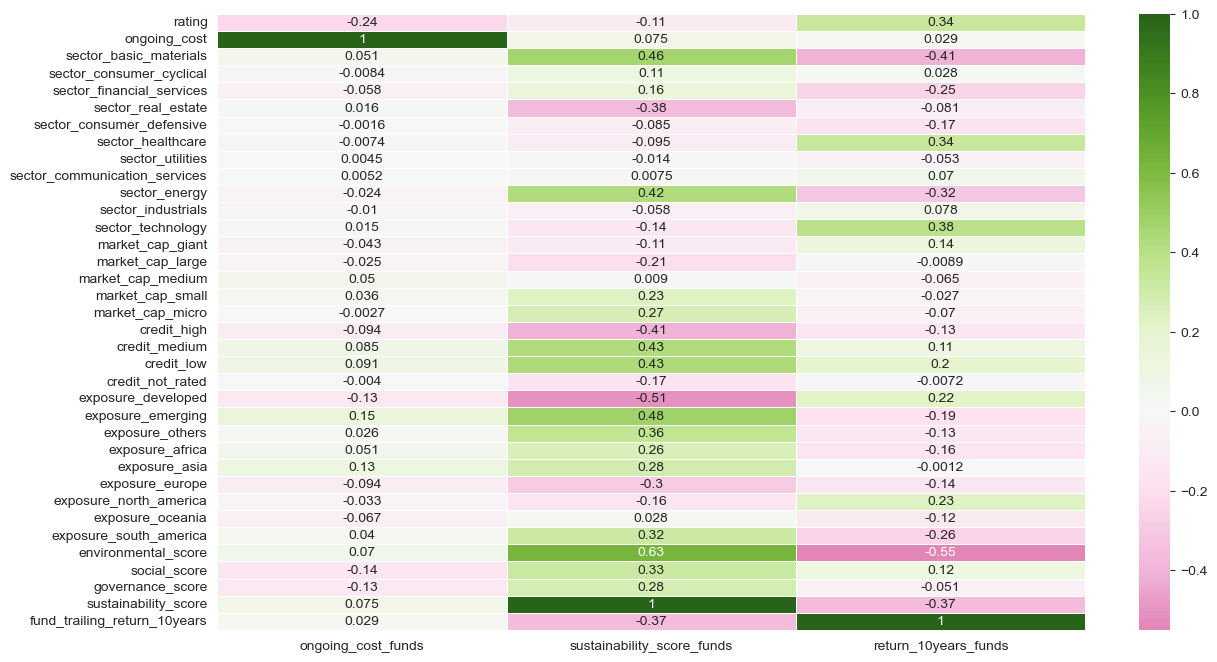

In [51]:
fig, ax = plt.subplots(figsize=(14,8))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

sns.heatmap(matrix_funds_sel, annot=True, linewidth=.5, ax=ax, cmap="PiYG", center=0)

S'ha dividit la correlació segons els etfs i els fons degut al seu comportament notablement diferent. La correlació en la columna dels costos sembla sols ser destacable en el cas dels etfs. En el cas de la rendibilitat i la sostenibilitat la correlació és una mica més parella.

## 3. Agrupació

#### a. K-MEANS

A l'hora de fer una agrupació que tingui sentit, ens trobem amb el problema que ens falten dades. Els etfs i sobretot, els fons d'inversió activa, requereixen altres indicadors que no es disposen en aquest dataset. Per exemple, quina és la *Volatitat* del producte. Un fons de renda variable tindrà més volatilitat, més variació, tant positiva com negativa, de la rendibilitat que un de renda fixa, però a canvi, la rendibilitat podria ser millor. També hi ha indicadors com el *Tracking Error*, que mesura la desviació d'un fons respecte al seu índex de referència. En un fons de gestió activa, si el Tracking Error és massa baix, podria indicar que realment el gestor no està activament gestionant el patrimoni del fons i simplement està seguint el que fa l'índex, és a dir, no és un bon fons. En un ETF o un fons d'inversió de gestió passiva, seria al contrari, busquem que el Tracking Error sigui el més baix possible. Un altre indicador que ens seria molt útil seria l'Alpha, que és la rendibilitat addicional que obté el fons respecte a l'índex de referència. Finalment, tenim el ratio de Sharpe, quina rendibilitat trau un fons en funció del risc al qual s'exposa (relacionada amb la volatilitat) En conclusió, no es pot realitzar una agrupació del tot satisfactòria a causa de la limitació del dataset.

De totes maneres, aquests indicadors són utilitzats pel portal Morningstar per crear el seu rating, que puntua, d'una a 5 estreles, que compara fons similars (de categoria semblant) en funció de la seva rendibilitat ajustada al risc, així com l'analyst rating, que analitza quines són les perspectives. Farem servir el primer i, per tant, exclourem aquells productes que no el tenen calculat. Algunes supracategories no tenen pràcticament cap producte amb rating i també seran eliminades.

In [52]:
for supra in morningstar_exposure_egs['supracategory'].unique():
    search = morningstar_exposure_egs['supracategory'] == supra
    subset = morningstar_exposure_egs[search]
    n_rows = len(subset)
    null_values = morningstar_exposure_egs[search][['rating', 'sustainability_score']].isna()
    null_values['combined'] = null_values['rating'] | null_values['sustainability_score']
    n_null_values = null_values['combined'].sum(axis=0)
    print(f'Supracategoria [{supra}]: {str(n_null_values)}/{str(n_rows)}')

Supracategoria [Renta Variable]: 7113/19738
Supracategoria [Renta Fixa]: 13895/16039
Supracategoria [Immobles]: 344/619
Supracategoria [Commodities]: 408/408
Supracategoria [Monetaris]: 929/929
Supracategoria [Alternatius]: 1416/1416
Supracategoria [Mixtes]: 4048/6067
Supracategoria [Altres]: 109/134


In [53]:
subset = morningstar_exposure_egs[morningstar_exposure_egs['supracategory'].isin(['Commodities', 'Monetaris', 'Alternatius', 'Altres'])]

morningstar_kmeans = morningstar_exposure_egs.drop(subset.index)

No seleccionem totes les variables relacionades amb el sector, sinó les que tenen més correlació amb la rendibilitat, la sostenibilitat o els costos.

In [54]:
col_sel = [
    'isin', 'fund_name', 'supracategory', 'rating', 'ongoing_cost',
    'sector_basic_materials', 'sector_real_estate',
    'sector_energy', 'sector_technology',
    'market_cap_giant', 'market_cap_large', 'market_cap_medium', 'market_cap_small', 'market_cap_micro',
    'credit_high', 'credit_medium', 'credit_low',
    'exposure_developed', 'exposure_emerging', 'exposure_others',
     'sustainability_score',
    'fund_trailing_return_3years']

morningstar_kmeans = morningstar_kmeans[col_sel]

In [55]:
columns = ['sector_basic_materials',
            'sector_real_estate', 'sector_energy', 'sector_technology',
            'market_cap_giant', 'market_cap_large', 'market_cap_medium', 'market_cap_small', 'market_cap_micro',
            'credit_high', 'credit_medium', 'credit_low']

for col in columns:
    morningstar_kmeans[col].fillna(0, inplace=True)

In [56]:
null_values = morningstar_kmeans.isna()
num_null_values_per_column = null_values.sum(axis=0)

print("Nombre de valors NaN per columna:")
print(num_null_values_per_column)

morningstar_kmeans = morningstar_kmeans.dropna()

Nombre de valors NaN per columna:
isin                               0
fund_name                          0
supracategory                      0
rating                         15647
ongoing_cost                    2477
sector_basic_materials             0
sector_real_estate                 0
sector_energy                      0
sector_technology                  0
market_cap_giant                   0
market_cap_large                   0
market_cap_medium                  0
market_cap_small                   0
market_cap_micro                   0
credit_high                        0
credit_medium                      0
credit_low                         0
exposure_developed                 0
exposure_emerging                  0
exposure_others                    0
sustainability_score           16091
fund_trailing_return_3years    10406
dtype: int64


In [57]:
# Dummy variables
dummy_supracategory = pd.get_dummies(morningstar_kmeans['supracategory'])
morningstar_kmeans = morningstar_kmeans.join(dummy_supracategory)
dummy_supracategory.head()

,Immobles,Mixtes,Renta Fixa,Renta Variable
0,0,0,0,1
2,0,0,0,1
4,0,0,1,0
5,0,0,1,0
7,0,0,0,1


In [58]:
# Filtrar les dades per a eliminar valors fora de l'interval [0, 100]
morningstar_f = morningstar_kmeans.query('credit_high <= 100')
morningstar_f = morningstar_f.query('credit_medium >= 0 and credit_medium <= 100')
morningstar_f = morningstar_f.query('credit_low >= 0 and credit_low <= 100')

# Filtrar les dades per a eliminar valors fora de l'interval [0, 100]
morningstar_f = morningstar_f.query('market_cap_giant >= 0 and market_cap_giant <= 100')
morningstar_f = morningstar_f.query('market_cap_large >= 0 and market_cap_large <= 100')
morningstar_f = morningstar_f.query('market_cap_medium >= 0 and market_cap_medium <= 100')
morningstar_f = morningstar_f.query('market_cap_small >= 0 and market_cap_small <= 100')
morningstar_f = morningstar_f.query('market_cap_micro >= 0 and market_cap_micro <= 100')

# Filtrar les dades per a eliminar valors fora de l'interval [0, 100]
morningstar_f = morningstar_f.query('sector_basic_materials >= 0 and sector_basic_materials <= 100')
morningstar_f = morningstar_f.query('sector_real_estate >= 0 and sector_real_estate <= 100')
morningstar_f = morningstar_f.query('sector_energy >= 0 and sector_energy <= 100')
morningstar_kmeans = morningstar_f.query('sector_technology >= 0 and sector_technology <= 100')

In [59]:
morningstar_kmeans = morningstar_kmeans.reindex(columns=['isin', 'fund_name', 'rating', 'ongoing_cost', 'sector_basic_materials', 'sector_real_estate', 'sector_energy', 'sector_technology', 'market_cap_giant', 'market_cap_large', 'market_cap_medium', 'market_cap_small', 'market_cap_micro', 'credit_high', 'credit_medium', 'credit_low', 'exposure_developed', 'exposure_emerging', 'sustainability_score', 'Renta Variable', 'Renta Fixa', 'Mixtes', 'Immobles', 'fund_trailing_return_3years'])

In [60]:
# Normalització de les dades

mmscaler = MinMaxScaler()

columns = morningstar_kmeans.columns[2:]

morningstar_kmeans_norm = pd.DataFrame(morningstar_kmeans[columns])

mmscaler = MinMaxScaler()

for col in morningstar_kmeans_norm.columns[0:]:

    reshaped = np.array(morningstar_kmeans[col]).reshape(-1,1)
    normalized = mmscaler.fit_transform(reshaped)
    morningstar_kmeans_norm[col] = normalized

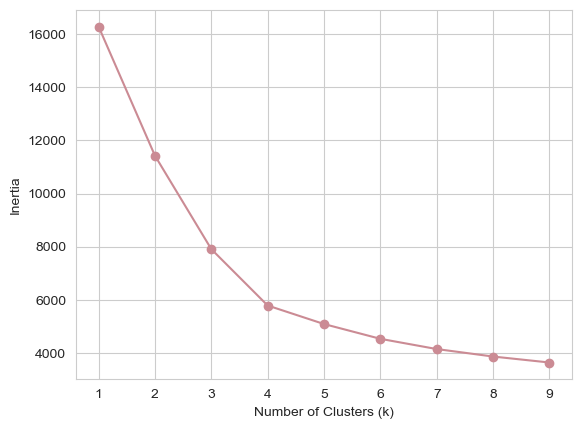

In [61]:
# Elecció de clusters
num_clusters = range(1,10)

col_sel = morningstar_kmeans_norm.columns[0:]

inertias = []

for k in num_clusters:
  model = KMeans(n_clusters=k, random_state = 42)
  model.fit(morningstar_kmeans_norm[col_sel])
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
 
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
 
plt.show()

Segons la corva de descens de la inèrcia, podem elegir 5 cluster.

In [62]:
# Ajustem model per a 5 clusters

model = KMeans(n_clusters=5, random_state = 42)
model.fit(morningstar_kmeans_norm[col_sel])
inertias.append(model.inertia_)

In [63]:
morningstar_kmeans_norm['cluster_id'] = model.labels_

i=0

filter = morningstar_kmeans_norm['cluster_id'] == i
sub_fb = morningstar_kmeans_norm[filter]
clust_km = pd.DataFrame({'Cluster 1':sub_fb.mean()})

i=1

filter = morningstar_kmeans_norm['cluster_id'] == i
sub_fb = morningstar_kmeans_norm[filter]
clust_km['Cluster 2'] = sub_fb.mean()

i=2

filter = morningstar_kmeans_norm['cluster_id'] == i
sub_fb = morningstar_kmeans_norm[filter]
clust_km['Cluster 3'] = sub_fb.mean()

i=3

filter = morningstar_kmeans_norm['cluster_id'] == i
sub_fb = morningstar_kmeans_norm[filter]
clust_km['Cluster 4'] = sub_fb.mean()

i=4

filter = morningstar_kmeans_norm['cluster_id'] == i
sub_fb = morningstar_kmeans_norm[filter]
clust_km['Cluster 5'] = sub_fb.mean()


# Aplicar gradient de color al dataframe
clust_km[0:-1].style.background_gradient(cmap='YlGn')

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
rating,0.573534,0.556357,0.544809,0.546026,0.531504
ongoing_cost,0.269904,0.222322,0.246808,0.177712,0.249868
sector_basic_materials,0.065480,0.071118,0.060063,0.004198,0.002980
sector_real_estate,0.036207,0.026135,0.037976,0.016762,0.938184
sector_energy,0.046339,0.034111,0.030665,0.026199,0.000000
sector_technology,0.179888,0.150900,0.156956,0.016071,0.012250
market_cap_giant,0.479084,0.306405,0.403558,0.014325,0.039227
market_cap_large,0.283016,0.308508,0.326973,0.033469,0.317702
market_cap_medium,0.174898,0.249950,0.196591,0.037217,0.495632
market_cap_small,0.049267,0.105382,0.057562,0.015580,0.131241


Els clusters 1 i 2 corresponen a la renda variable. Es diferencien segons la seua exposició en el mercat emergent (1) o el mercat desenvolupat (2).
Els altres clusters resulta de la separació en les supracategories, Renda Fixa, els Mixtes i els Immobles.

#### b. Agrupació Jeràrquica:

In [64]:
morningstar_agru = morningstar_kmeans_norm[morningstar_kmeans_norm.columns[:-1]].copy()

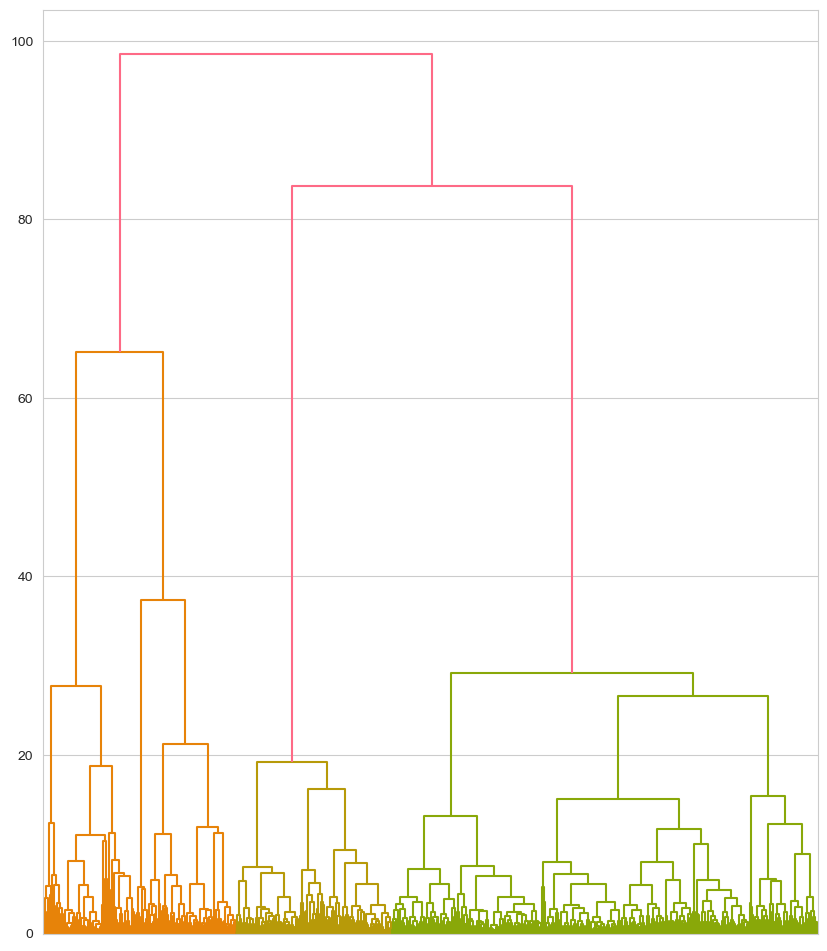

In [65]:
colors = sns.husl_palette(n_colors=11, s=1)
sns.set_palette(colors)

plt.subplots(1, 1, figsize=(10,12))
dend = sch.dendrogram(sch.linkage(morningstar_agru, method='ward', metric="euclidean"), no_labels=True)

A vista, podem pensar en fer 4 o 5 agrupacions. Provarem primer amb 4.

In [66]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(morningstar_agru)
labels = model.labels_

#### c. Comparació 

Comparem amb el index silhouette els dos models que hem ajustat fins ara.

In [67]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Kmeans normalitzats amb categories codificados 'one-hot'
model = KMeans(n_clusters=5, random_state=42)
model.fit(morningstar_agru)
labels = model.labels_
variables = morningstar_agru
silhouette_avg = silhouette_score(variables, labels)
print('silhouette average')
print(f'K-Means:', np.round(silhouette_avg, 2))

# Jerarquització
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(morningstar_agru)
labels = model.labels_
variables = morningstar_agru
silhouette_avg = silhouette_score(variables, labels)
print(f'Jerarquització: ', np.round(silhouette_avg, 2))

silhouette average
K-Means: 0.51
Jerarquització:  0.49


Provem si podem trobar un nombre de grups amb índex de silhouette milor.

In [68]:
for k in range(2,10):

    model = KMeans(n_clusters=k, random_state = 42)
    labels = model.fit_predict(morningstar_agru)
    
    silhouette_avg = silhouette_score(morningstar_agru, labels)
    print("Número de clusters =", k,
          "Mitjana de silhouette_score :", silhouette_avg)
    
print('------------------------')
    
for k in range(2,10):

    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    labels = model.fit_predict(morningstar_agru)
    
    silhouette_avg = silhouette_score(morningstar_agru, labels)
    print("Número de clusters =", k,
          "Mitjana de silhouette_score :", silhouette_avg)

Número de clusters = 2 Mitjana de silhouette_score : 0.41041833586622917
Número de clusters = 3 Mitjana de silhouette_score : 0.4305803453943762
Número de clusters = 4 Mitjana de silhouette_score : 0.4892471707519671
Número de clusters = 5 Mitjana de silhouette_score : 0.5080288133333557
Número de clusters = 6 Mitjana de silhouette_score : 0.3519492890735696
Número de clusters = 7 Mitjana de silhouette_score : 0.3513543496290045
Número de clusters = 8 Mitjana de silhouette_score : 0.3336363438108837
Número de clusters = 9 Mitjana de silhouette_score : 0.317947644795248
------------------------
Número de clusters = 2 Mitjana de silhouette_score : 0.41041833586622917
Número de clusters = 3 Mitjana de silhouette_score : 0.4289800161424114
Número de clusters = 4 Mitjana de silhouette_score : 0.4885298691294326
Número de clusters = 5 Mitjana de silhouette_score : 0.5073143160284822
Número de clusters = 6 Mitjana de silhouette_score : 0.30996247566464424
Número de clusters = 7 Mitjana de sil

Sembla que 5, ambdos casos, dona el major silhouette.

In [69]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(morningstar_agru)
labels = model.labels_

In [70]:
morningstar_agru['cluster_id'] = model.labels_

i=0

filter = morningstar_agru['cluster_id'] == i
sub_fb = morningstar_agru[filter]
clust_agru = pd.DataFrame({'Cluster 1':sub_fb.mean()})

i=1

filter = morningstar_agru['cluster_id'] == i
sub_fb = morningstar_agru[filter]
clust_agru['Cluster 2'] = sub_fb.mean()

i=2

filter = morningstar_agru['cluster_id'] == i
sub_fb = morningstar_agru[filter]
clust_agru['Cluster 3'] = sub_fb.mean()

i=3

filter = morningstar_agru['cluster_id'] == i
sub_fb = morningstar_agru[filter]
clust_agru['Cluster 4'] = sub_fb.mean()

i=4

filter = morningstar_agru['cluster_id'] == i
sub_fb = morningstar_agru[filter]
clust_agru['Cluster 5'] = sub_fb.mean()

clust_agru[0:-1].style.background_gradient(cmap='YlGn')

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
rating,0.555835,0.546026,0.574854,0.544809,0.531504
ongoing_cost,0.222321,0.177712,0.269614,0.246808,0.249868
sector_basic_materials,0.070844,0.004198,0.066263,0.060063,0.002980
sector_real_estate,0.026107,0.016762,0.036220,0.037976,0.938184
sector_energy,0.033819,0.026199,0.047059,0.030665,0.000000
sector_technology,0.150995,0.016071,0.179450,0.156956,0.012250
market_cap_giant,0.306492,0.014325,0.477782,0.403558,0.039227
market_cap_large,0.308603,0.033469,0.282913,0.326973,0.317702
market_cap_medium,0.250052,0.037217,0.175083,0.196591,0.495632
market_cap_small,0.105191,0.015580,0.050134,0.057562,0.131241


In [71]:
clust_km[0:-1].style.background_gradient(cmap='YlGn')

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
rating,0.573534,0.556357,0.544809,0.546026,0.531504
ongoing_cost,0.269904,0.222322,0.246808,0.177712,0.249868
sector_basic_materials,0.065480,0.071118,0.060063,0.004198,0.002980
sector_real_estate,0.036207,0.026135,0.037976,0.016762,0.938184
sector_energy,0.046339,0.034111,0.030665,0.026199,0.000000
sector_technology,0.179888,0.150900,0.156956,0.016071,0.012250
market_cap_giant,0.479084,0.306405,0.403558,0.014325,0.039227
market_cap_large,0.283016,0.308508,0.326973,0.033469,0.317702
market_cap_medium,0.174898,0.249950,0.196591,0.037217,0.495632
market_cap_small,0.049267,0.105382,0.057562,0.015580,0.131241


## 4. CONCLUSIONS

- Els costos de gestió dels ETFs són notablement inferiors als dels fons d'inversió, fins i tot en els de gestió passiva. El cost de gestió dels ETFs està més correlacionat amb la rendibilitat, així com amb els sectors on s'inverteix.
- La rendibilitat dels ETFs és molt similar a la dels fons d'inversió estudiat a 3 i 5 anys, amb una diferència del 10% a favor dels fons de gestió. No obstant, a 10 anys, la diferència arriba fins al 54%, principalment a causa de la presència d'ETFs amb rendibilitats molt negatives. Per això, és important la presència de gestors que puguin optimitzar les inversions en temps adversos.
- El cost de gestió depèn dels actius on s'inverteix. A mida que augmenta la rendibilitat potencial, també ho fan els costos de gestió (renda variable/mixta versus renda fixa).
- La sostenibilitat de les inversions es veu influenciada pels sectors i la geografia on s'inverteix. En renda variable, els sectors més sostenibles són la salut, el consum defensiu, els serveis públics i la indústria. En canvi, els materials bàsics i l'energia afecten negativament la sostenibilitat. La mida de les empreses també afecta a la sostenibilitat. Els fons i ETFs que se centren en empreses de gran capitalització borsàtil obtenen millors puntuacions en sostenibilitat. A més, ofereixen una rendibilitat més alta.
- La renda fixa més sostenible és la de més qualitat, encara que també és la menys rendible.